In [1]:
import pandas as pd
import numpy as np

In [2]:
ht = pd.read_csv('./data/heart.csv')
# o2 = pd.read_csv('./data/o2Saturation.csv')

In [3]:
ht.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [4]:
ht.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

- <font color="Orange">Variable Explanation:</font>

    1. <font color="red">Age</font> : Age of the patient

    2. <font color="red">Sex</font> : Sex of the patient

    3. <font color="red">exang </font>: exercise induced angina 
        - 1 = Yes 
        - 0 = No

    4. <font color="red">caa </font>: number of major vessels (0-4)

    5. <font color="red">cp </font> : Chest Pain Type 
        - Value 1: Typical angina 
        - Value 2: Atypical angina 
        - Value 3: Non-anginal pain 
        - Value 4: Asymptomatic
    6. <font color="red">trtbps </font> : resting blood pressure (in mm Hg)

    7. <font color="red">chol </font> : cholestoral in mg/dl fetched via BMI sensor

    8. <font color="red">fbs </font> : (Fasting blood sugar > 120 mg/dl) 
        - 1 = True 
        - 0 = False

    9. <font color="red">rest_ecg </font> : Resting Electrocardiographic results 
        - Value 0: normal 
        - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
        - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

    10. <font color="red">thalach </font> : maximum heart rate achieved

    11. <font color="red">ST_Slope </font>: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

    12. <font color="red">target </font> : 
        - <font color="Orange">0</font> = less chance of heart attack 
        - <font color="Orange">1</font> = more chance of heart attack

In [5]:
ht.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
ht['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

In [7]:
ht['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [8]:
# o2.columns

# Machine Learning Model Bulding Started:

In [9]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
# import colorama
# from colorama import Back
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

# Importing Matplotlib and seaborn:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
Features = ht.drop(columns='output')

* Normalize:
    * Before starting the machine learning part, we must normalize the entire dataset (except target, but in this case, the target is binary and it's ok).

In [11]:
scaler = MinMaxScaler()
Norm_data = scaler.fit_transform(Features)
Norm_df = pd.DataFrame(Norm_data, columns= Features.columns)

In [12]:
Norm_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


In [13]:
X = Norm_df#This dataframe is created for features
y = ht['output'].values.reshape(-1,1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=40)

## KNN

In [15]:
X = Norm_df#This dataframe is created for features
y = ht['output'].values.reshape(-1,1)
training_acc_1 = []
test_acc_1 = []
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=40)


# KNN Tabs:
listTabs = [
    '$$\color{LimeGreen}\\text{Hyperparameter P = 1}$$',
    '$$\color{orange}\\text{Hyperparameter P = 2}$$',
]
# Hyperparameter p = 1
K = 3
clf_1 = KNeighborsClassifier(K, p=1)
clf_1.fit(X_train, y_train.ravel())
y_pred_1 = clf_1.predict(X_test)
print(f"Accuracy p=1: {round(metrics.accuracy_score(y_test,y_pred_1),3)}\n")
Best_knn = metrics.accuracy_score(y_test,y_pred_1)
conf_matrix_1 = confusion_matrix(y_test, y_pred_1)

# Hyperparameter p = 2
K = 3
clf_2 = KNeighborsClassifier(K, p=2)
clf_2.fit(X_train, y_train.ravel())
y_pred_2 = clf_2.predict(X_test)
print(f"Accuracy : {round(metrics.accuracy_score(y_test,y_pred_2),3)}")
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)

Accuracy p=1: 0.869

Accuracy : 0.918


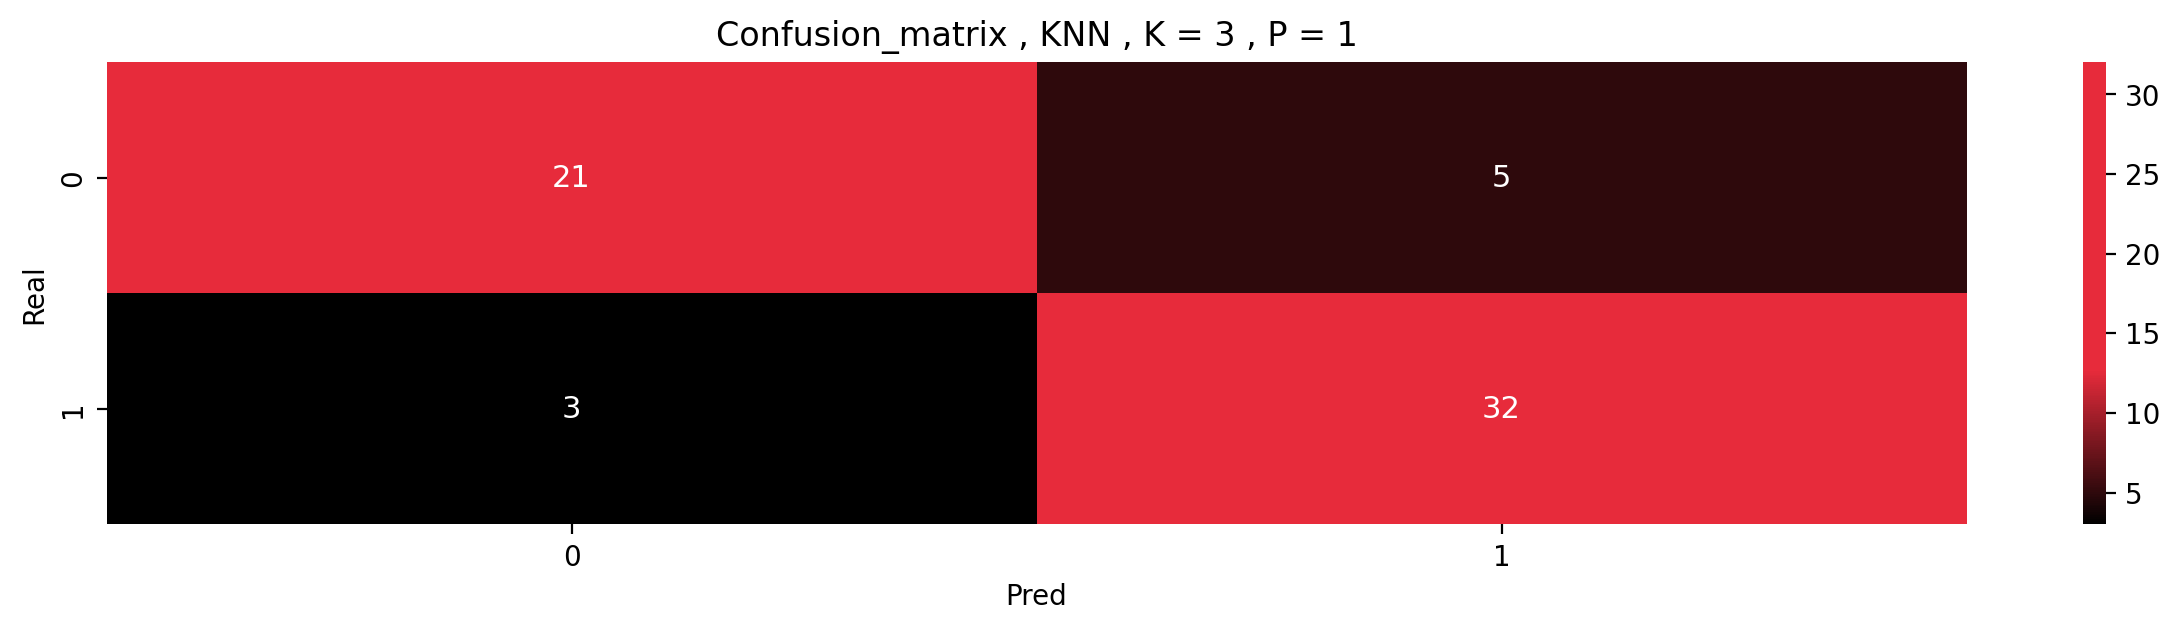

In [16]:
colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title(f"Confusion_matrix , KNN , K = 3 , P = 1")
annot = np.array([[f"{conf_matrix_1[0, 0]}", f"{conf_matrix_1[0, 1]}"],
                [f"{conf_matrix_1[1, 0]}", f"{conf_matrix_1[1, 1]}"]], dtype=object)


sns.heatmap(conf_matrix_1,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

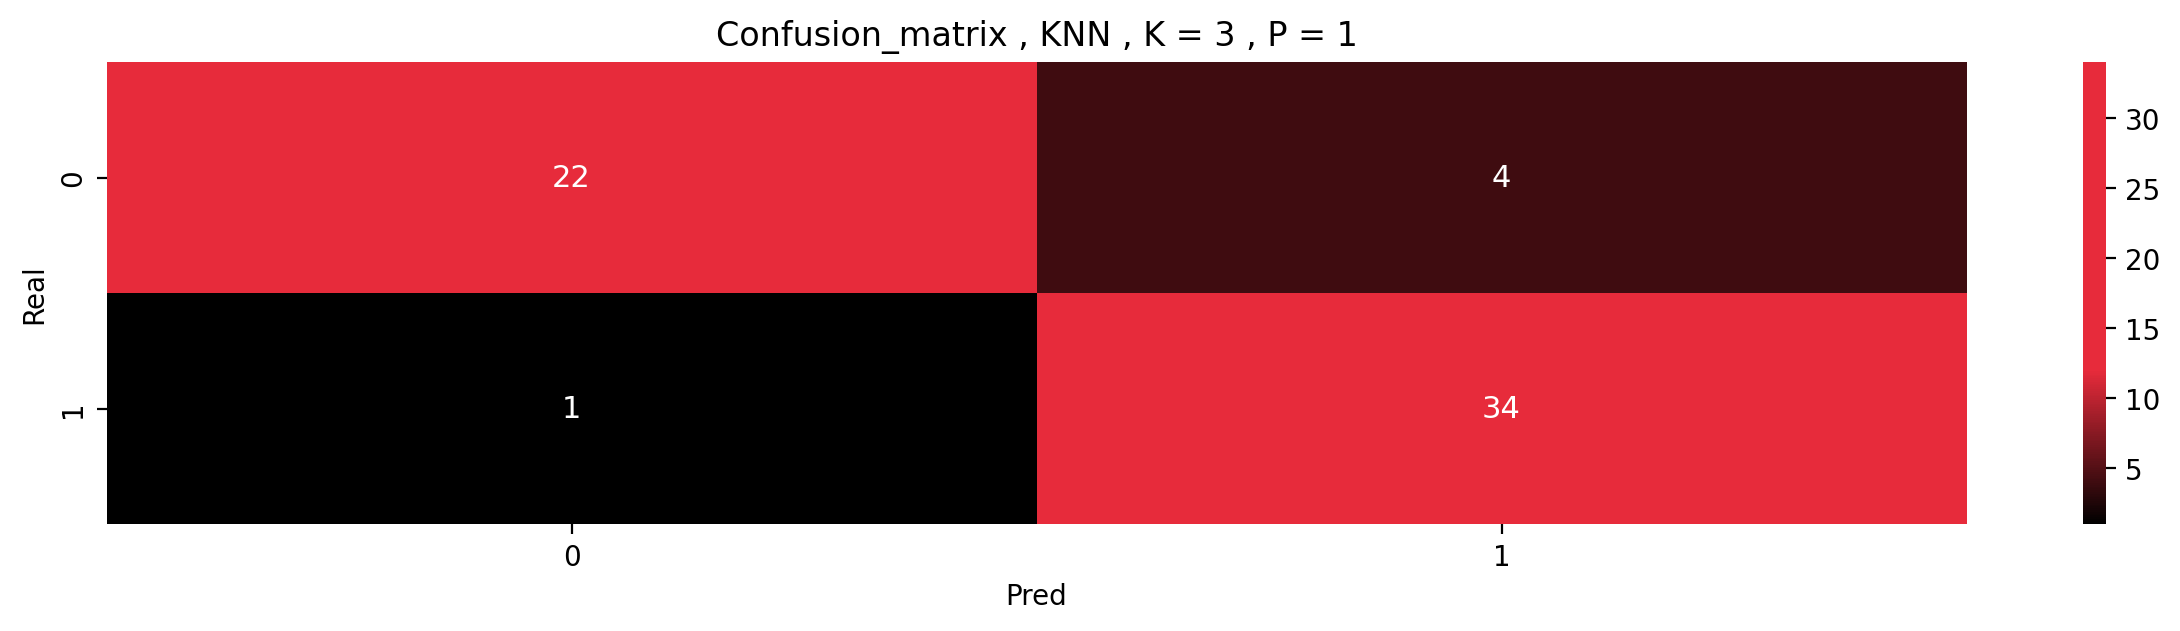

In [17]:
colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title(f"Confusion_matrix , KNN , K = 3 , P = 1")
annot = np.array([[f"{conf_matrix_2[0, 0]}", f"{conf_matrix_2[0, 1]}"],
                [f"{conf_matrix_2[1, 0]}", f"{conf_matrix_2[1, 1]}"]], dtype=object)


sns.heatmap(conf_matrix_2,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [18]:
class color:
   BOLD = '\033[1m'
   END = '\033[0m'

In [19]:
print(color.BOLD+ "Classification report for clf_1 (K= 3 and p = 1):"+color.END)
print(classification_report(y_train, clf_1.predict(X_train)))
print(color.BOLD +"Classification report for clf_2 (K= 3 and p = 2):"+ color.END)
print(classification_report(y_train, clf_2.predict(X_train)))

Classification report for clf_1 (K= 3 and p = 1):
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       112
           1       0.88      0.92      0.89       130

    accuracy                           0.88       242
   macro avg       0.89      0.88      0.88       242
weighted avg       0.88      0.88      0.88       242

Classification report for clf_2 (K= 3 and p = 2):
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       112
           1       0.89      0.91      0.90       130

    accuracy                           0.89       242
   macro avg       0.89      0.89      0.89       242
weighted avg       0.89      0.89      0.89       242



# SVM

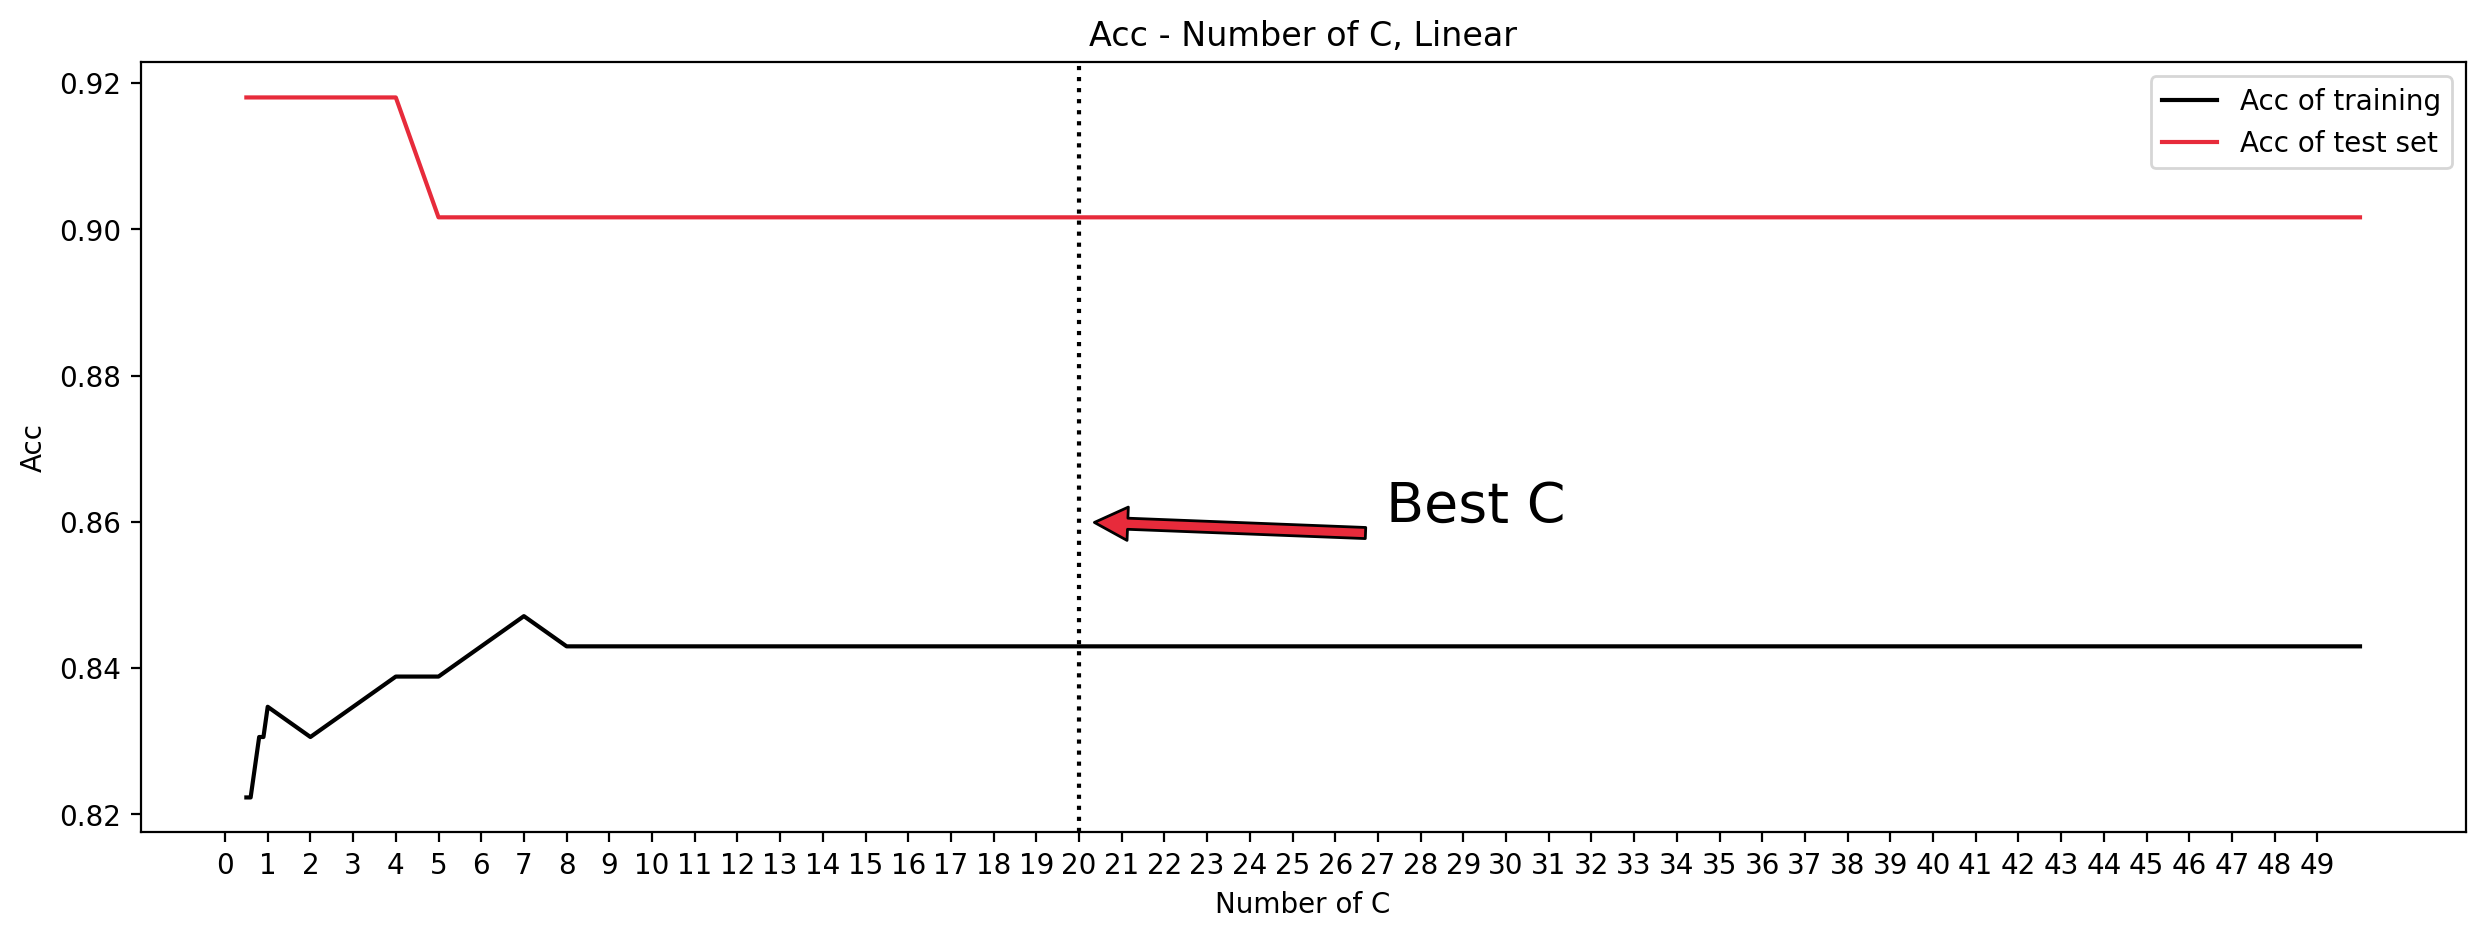

In [20]:
training_acc_3 = []
test_acc_3 = []

C = [0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
    26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
#Kernel = {'linear', 'poly', 'rbf', 'sigmoid'}

for C_ in C:
    SVM = SVC(C= C_, kernel= 'linear')
    SVM.fit (X_train, y_train.ravel())
    training_acc_3.append(SVM.score(X_train,y_train))
    test_acc_3.append(SVM.score(X_test, y_test))
    
    
plt.figure(figsize=(15,5), dpi=200)    
plt.plot(C, training_acc_3, label='Acc of training', color= 'black')
plt.plot(C, test_acc_3, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of C')
plt.title('Acc - Number of C, Linear')
plt.legend()
plt.xticks(range(0,50))
plt.annotate('Best C', xy=(20,0.86),xytext=(27.2,0.86), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x = 20, linestyle= 'dotted', c= 'black')
plt.show()

In [21]:
clf_3 = SVC(C= 20, kernel= 'linear')
clf_3.fit(X_train, y_train.ravel())
y_pred_3 = clf_3.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_3))
Best_SVM = metrics.accuracy_score(y_test,y_pred_3)

Accuracy 0.9016393442622951


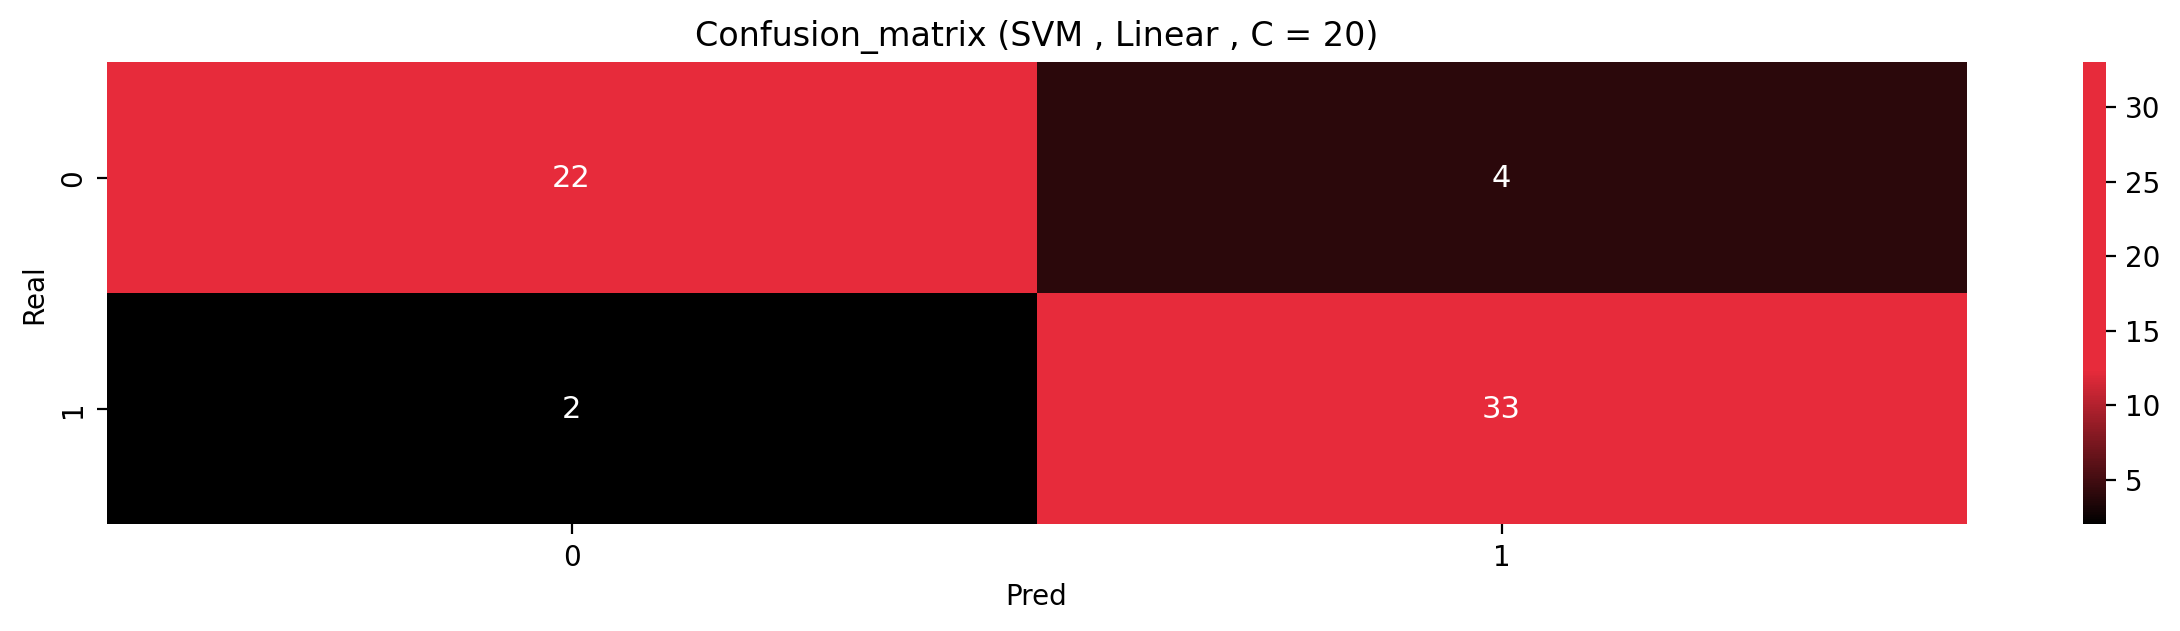

In [22]:
conf_matrix_3 = confusion_matrix(y_test, y_pred_3)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (SVM , Linear , C = 20)")
annot = np.array([[f"{conf_matrix_3[0, 0]}", f"{conf_matrix_3[0, 1]}"],
                  [f"{conf_matrix_3[1, 0]}", f"{conf_matrix_3[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_3,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()


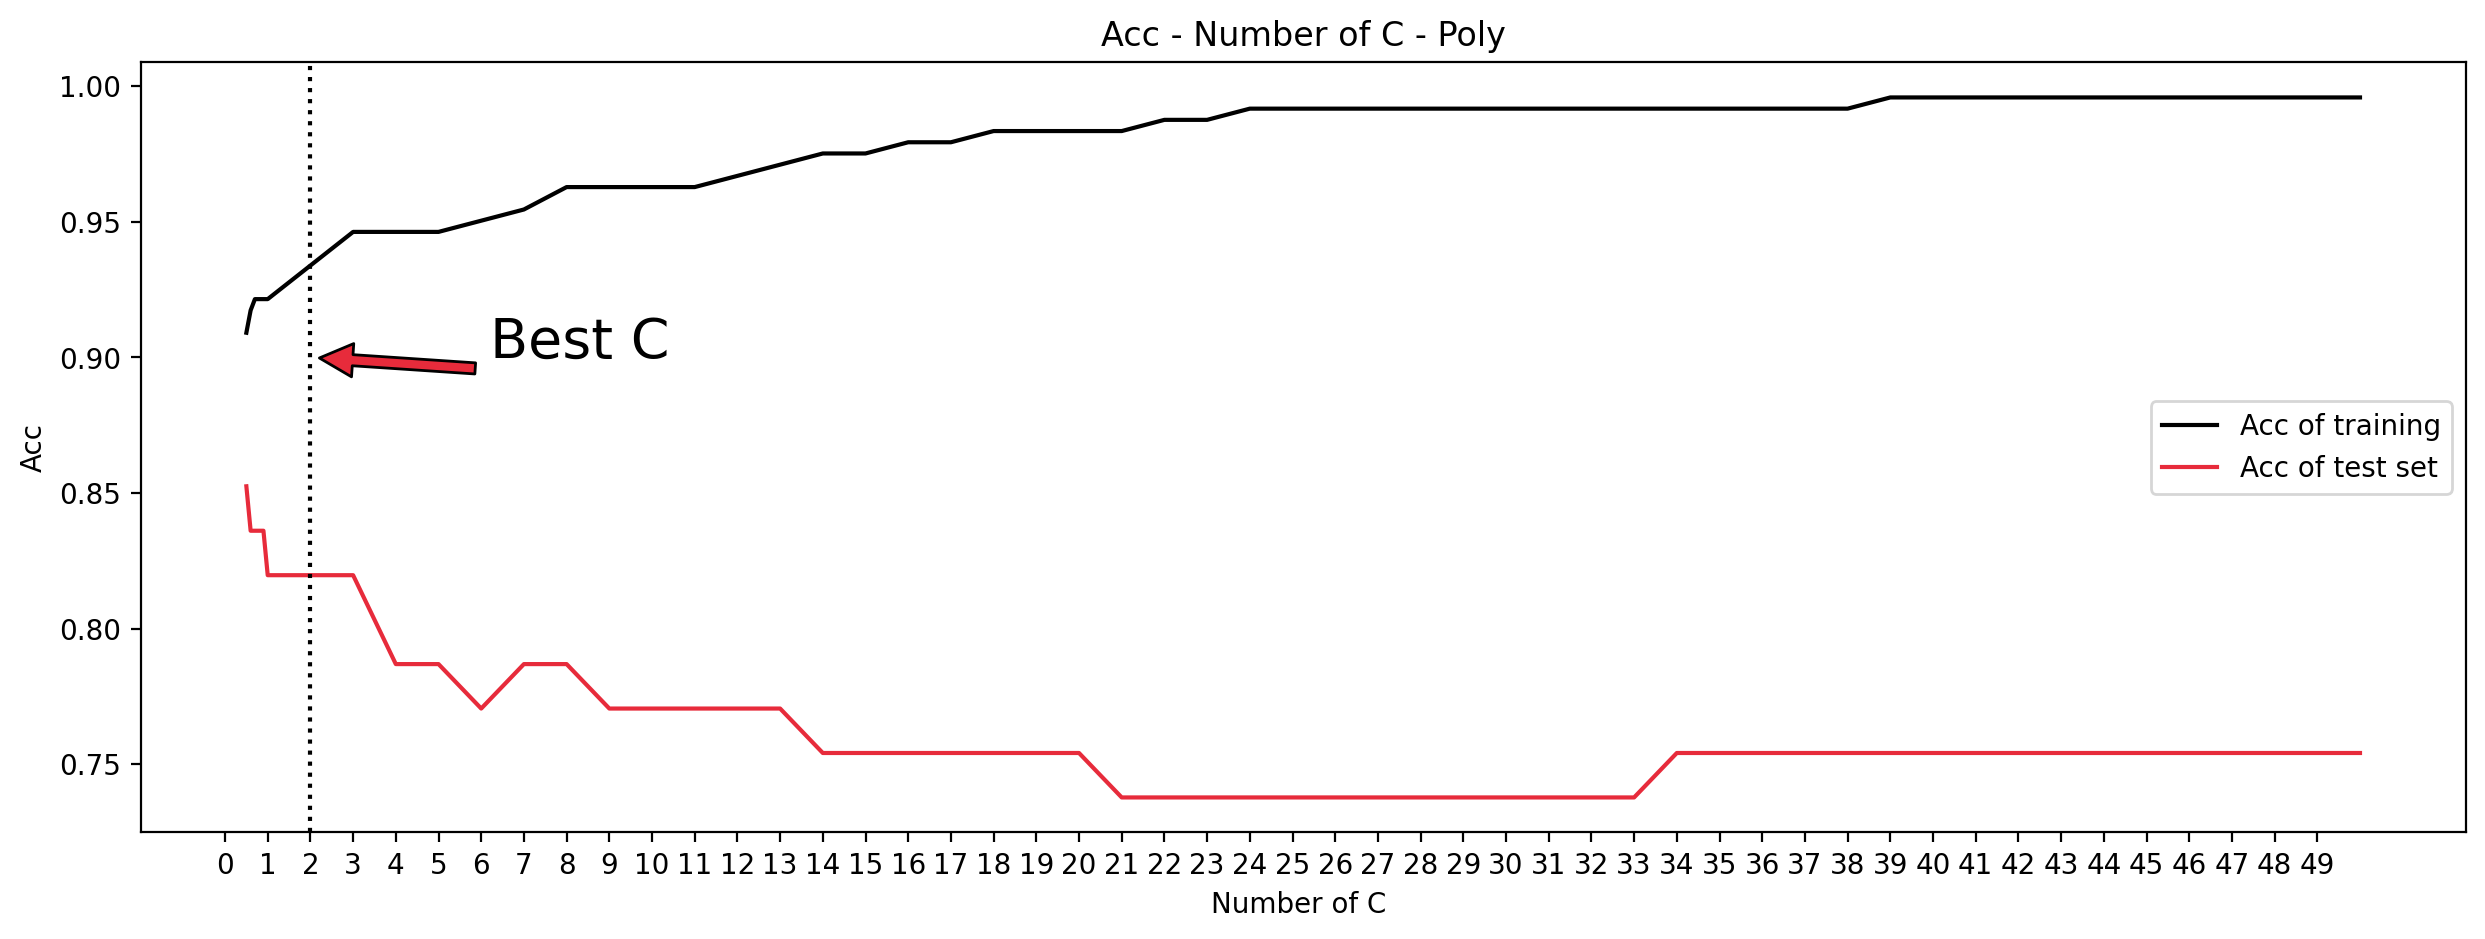

In [23]:
training_acc_4 = []
test_acc_4 = []

C = [0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
    26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
#Kernel = {'linear', 'poly', 'rbf', 'sigmoid'}

for C_ in C:
    SVM = SVC(C= C_, kernel= 'poly')
    SVM.fit (X_train, y_train.ravel())
    training_acc_4.append(SVM.score(X_train,y_train))
    test_acc_4.append(SVM.score(X_test, y_test))
    
    
plt.figure(figsize=(15,5), dpi=200)    
plt.plot(C, training_acc_4, label='Acc of training', color= 'black')
plt.plot(C, test_acc_4, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of C ')
plt.title('Acc - Number of C - Poly')
plt.legend()
plt.xticks(range(0,50))
plt.annotate('Best C', xy=(2,0.9),xytext=(6.2,0.9), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x = 2, linestyle= 'dotted', c= 'black')
plt.show()

In [24]:
clf_4 = SVC(C= 2, kernel= 'poly')
clf_4.fit(X_train, y_train.ravel())
y_pred_4 = clf_4.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_4))

Accuracy 0.819672131147541


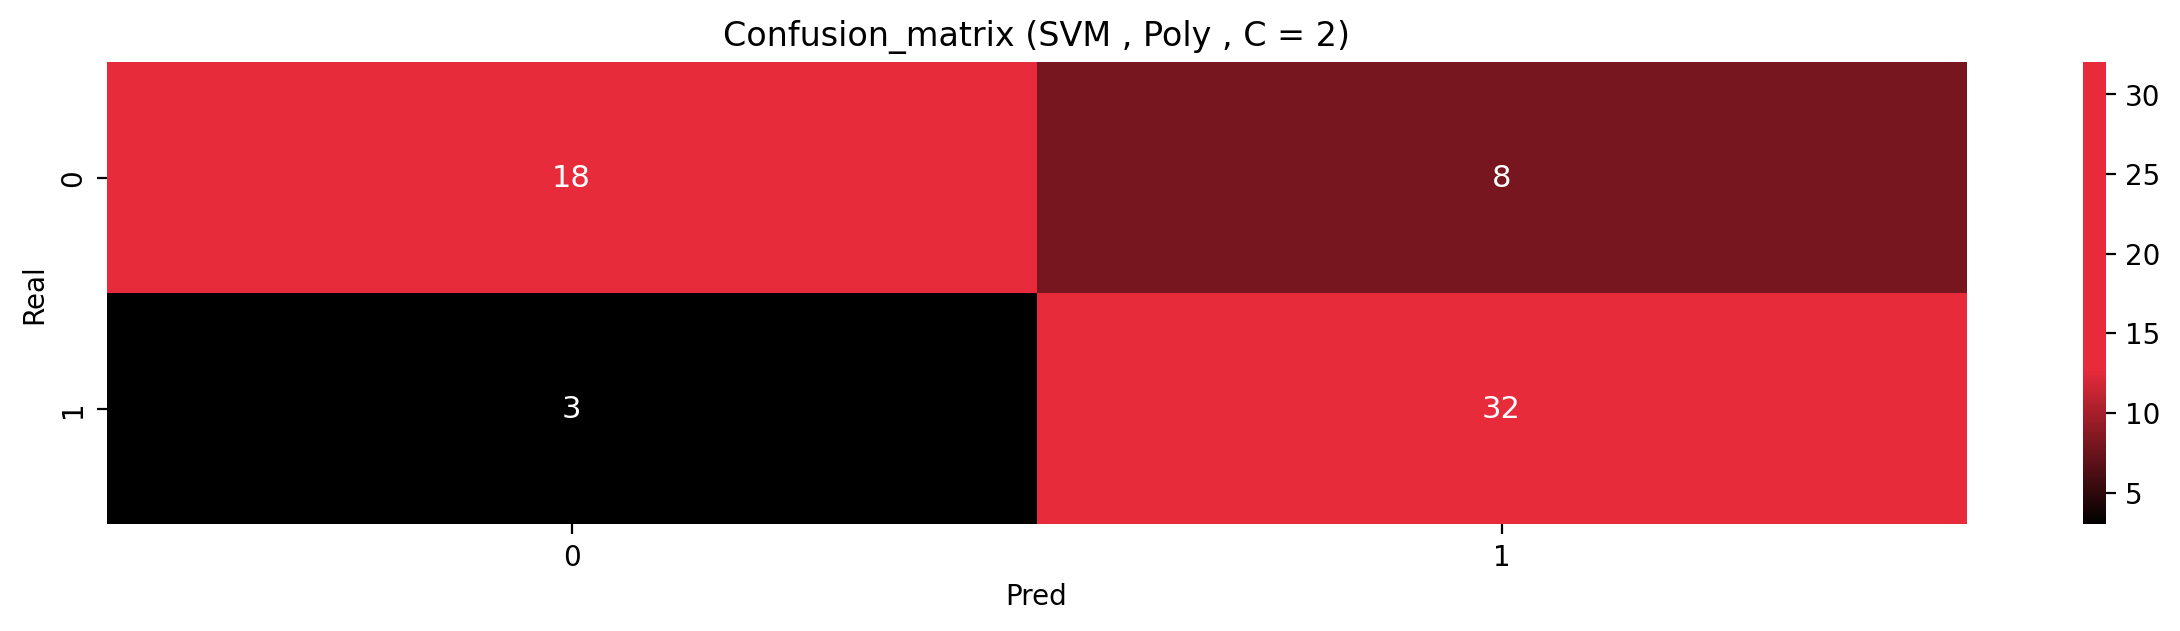

In [25]:
conf_matrix_4 = confusion_matrix(y_test, y_pred_4)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (SVM , Poly , C = 2)")
annot = np.array([[f"{conf_matrix_4[0, 0]}", f"{conf_matrix_4[0, 1]}"],
                  [f"{conf_matrix_4[1, 0]}", f"{conf_matrix_4[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_4,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

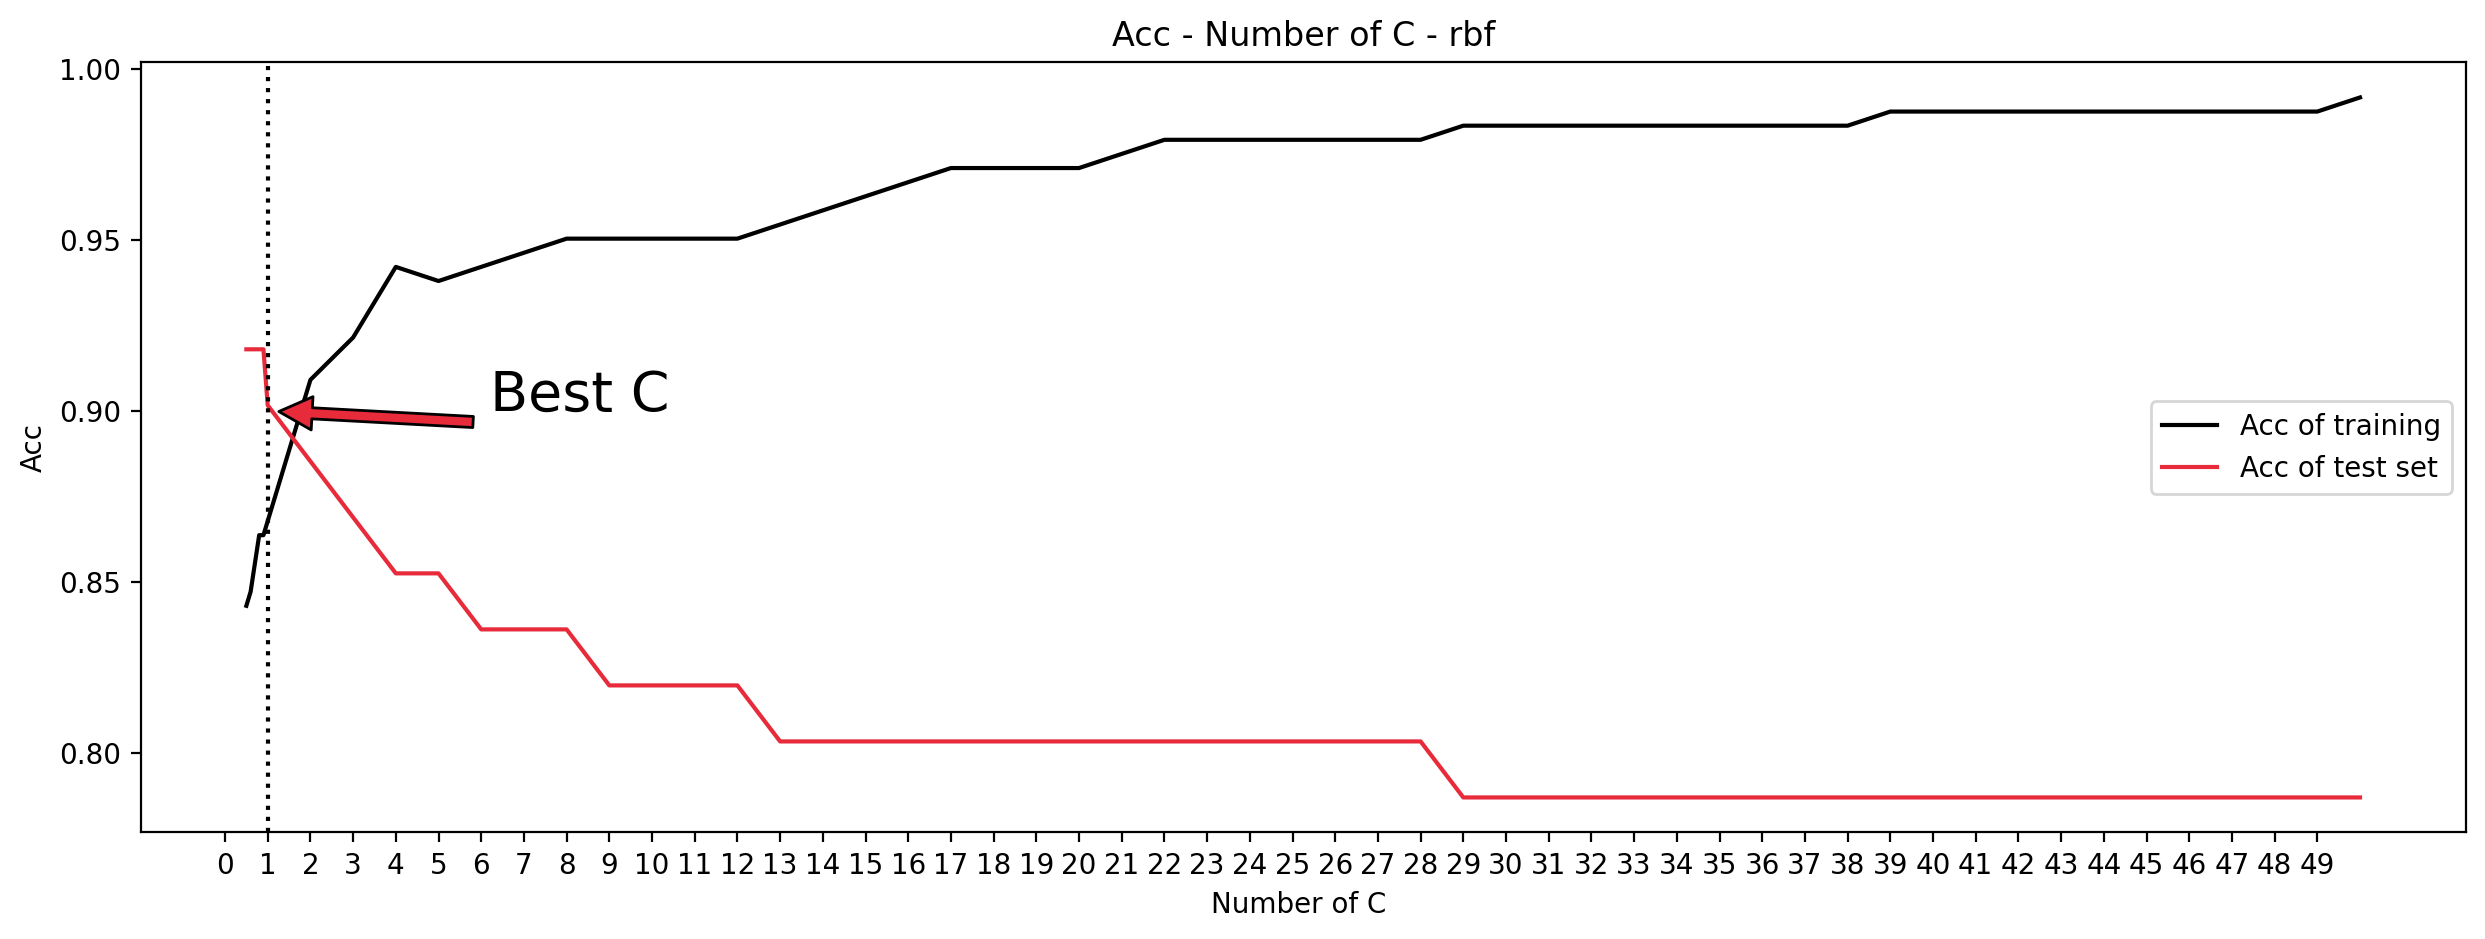

In [26]:
training_acc_5 = []
test_acc_5 = []

C = [0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
    26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
#Kernel = {'linear', 'poly', 'rbf', 'sigmoid'}

for C_ in C:
    SVM = SVC(C= C_, kernel= 'rbf')
    SVM.fit (X_train, y_train.ravel())
    training_acc_5.append(SVM.score(X_train,y_train))
    test_acc_5.append(SVM.score(X_test, y_test))
    
    
plt.figure(figsize=(15,5), dpi=200)    
plt.plot(C, training_acc_5, label='Acc of training', color= 'black')
plt.plot(C, test_acc_5, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of C ')
plt.title('Acc - Number of C - rbf')
plt.legend()
plt.xticks(range(0,50))
plt.annotate('Best C', xy=(1,0.9),xytext=(6.2,0.9), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x = 1, linestyle= 'dotted', c= 'black')
plt.show()


In [27]:
clf_5 = SVC(C= 1, kernel= 'rbf')
clf_5.fit(X_train, y_train.ravel())
y_pred_5 = clf_5.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_5))

Accuracy 0.9016393442622951


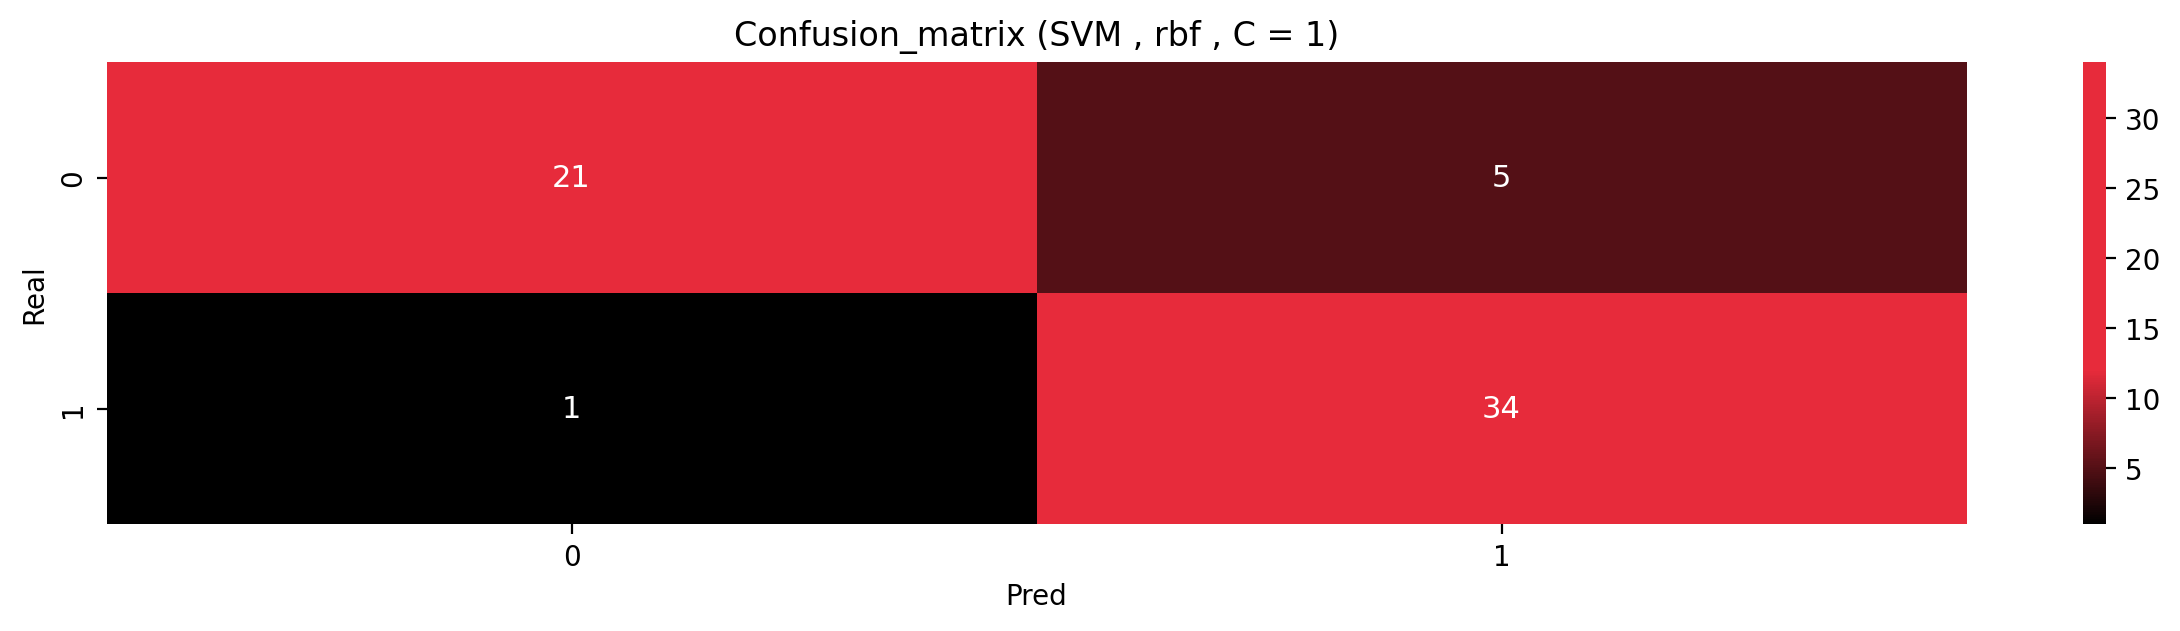

In [28]:
conf_matrix_5 = confusion_matrix(y_test, y_pred_5)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (SVM , rbf , C = 1)")
annot = np.array([[f"{conf_matrix_5[0, 0]}", f"{conf_matrix_5[0, 1]}"],
                  [f"{conf_matrix_5[1, 0]}", f"{conf_matrix_5[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_5,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

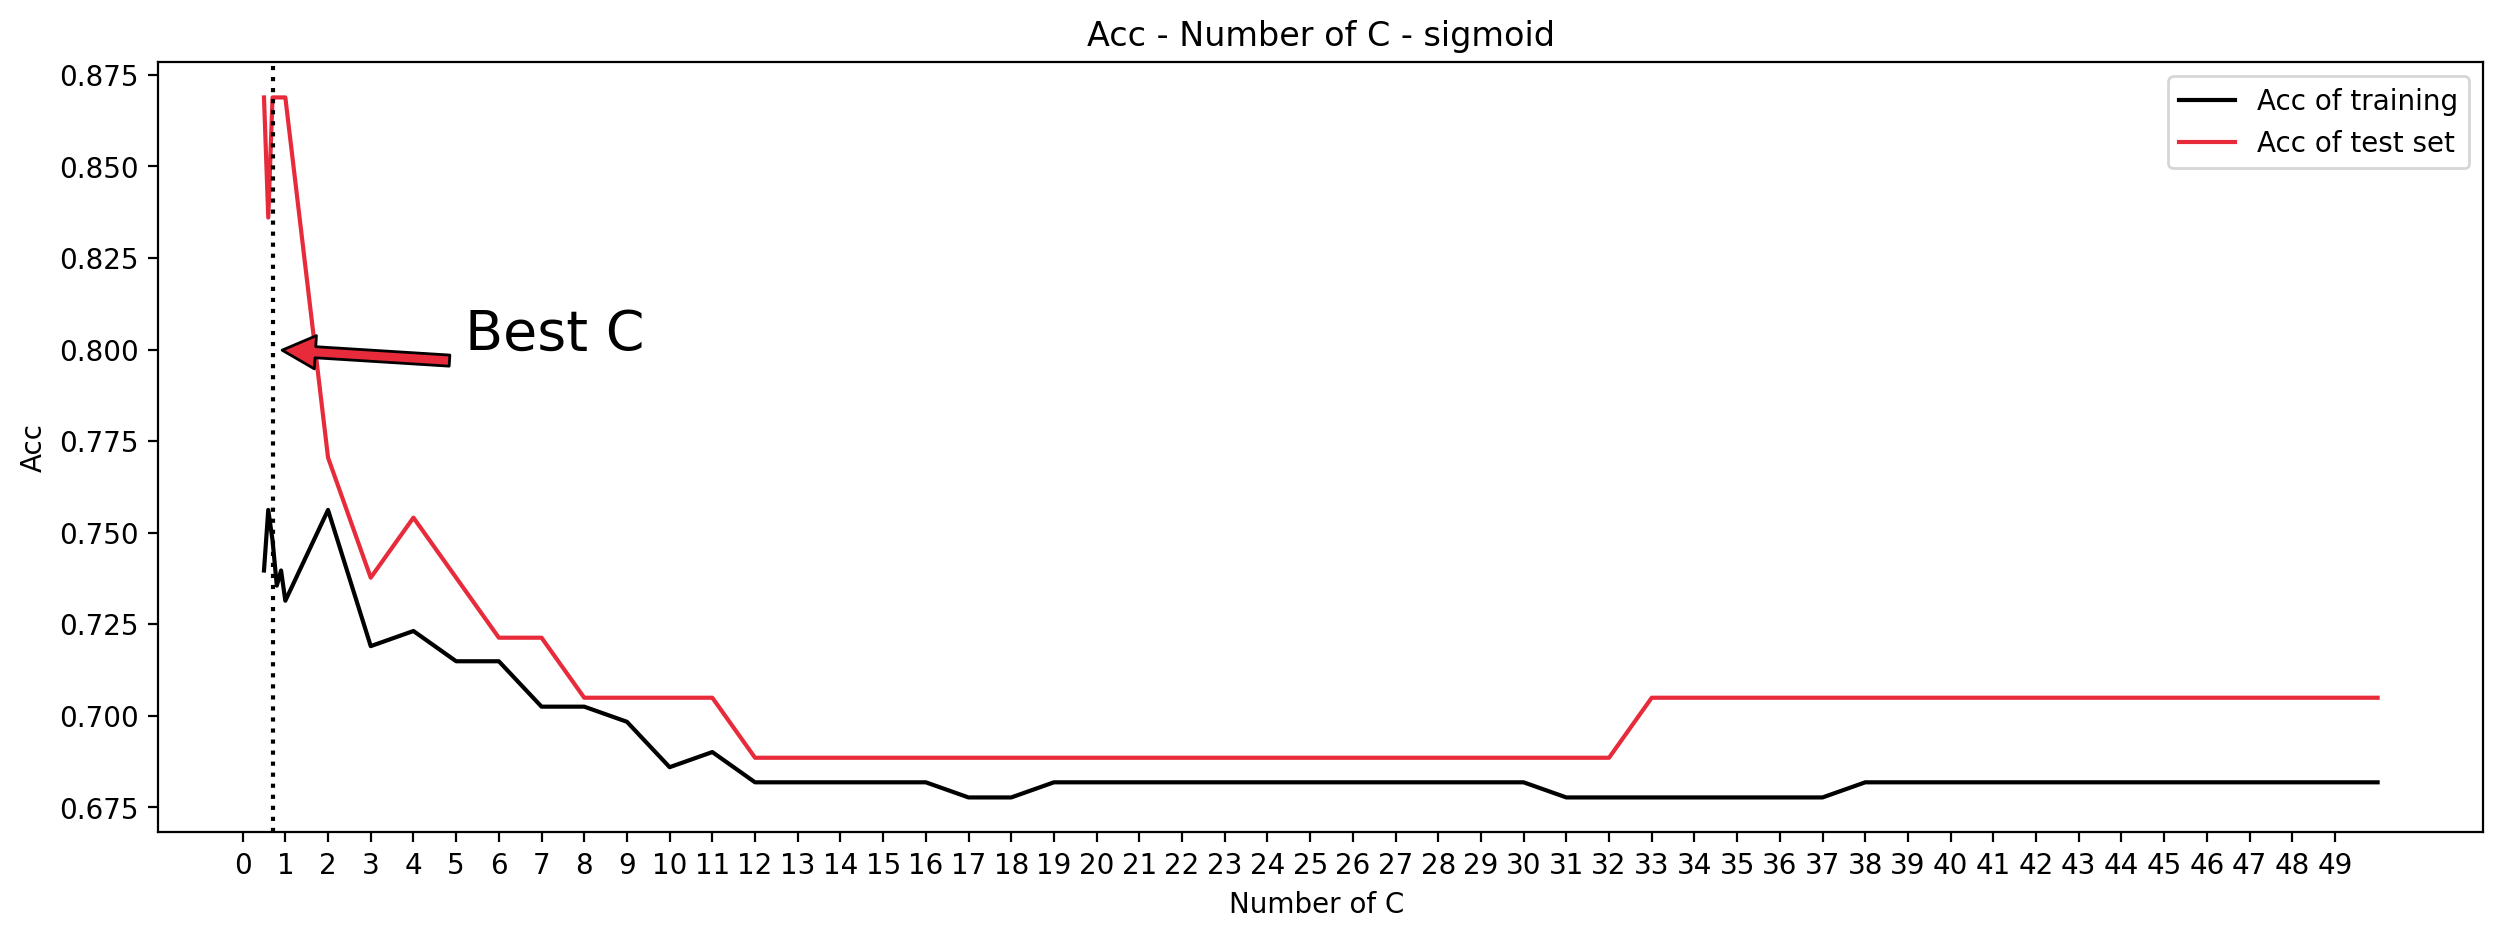

In [29]:
training_acc_6 = []
test_acc_6 = []

C = [0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
    26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
#Kernel = {'linear', 'poly', 'rbf', 'sigmoid'}

for C_ in C:
    SVM = SVC(C= C_, kernel= 'sigmoid')
    SVM.fit (X_train, y_train.ravel())
    training_acc_6.append(SVM.score(X_train,y_train))
    test_acc_6.append(SVM.score(X_test, y_test))
    
    
plt.figure(figsize=(15,5), dpi=200)    
plt.plot(C, training_acc_6, label='Acc of training', color= 'black')
plt.plot(C, test_acc_6, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of C ')
plt.title('Acc - Number of C - sigmoid')
plt.legend()
plt.xticks(range(0,50))
plt.annotate('Best C', xy=(0.7,0.8),xytext=(5.2,0.8), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x =0.7, linestyle= 'dotted', c= 'black')
plt.show()

In [30]:
clf_6 = SVC(C= 0.7, kernel= 'sigmoid')
clf_6.fit(X_train, y_train.ravel())
y_pred_6 = clf_6.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_6))

Accuracy 0.8688524590163934


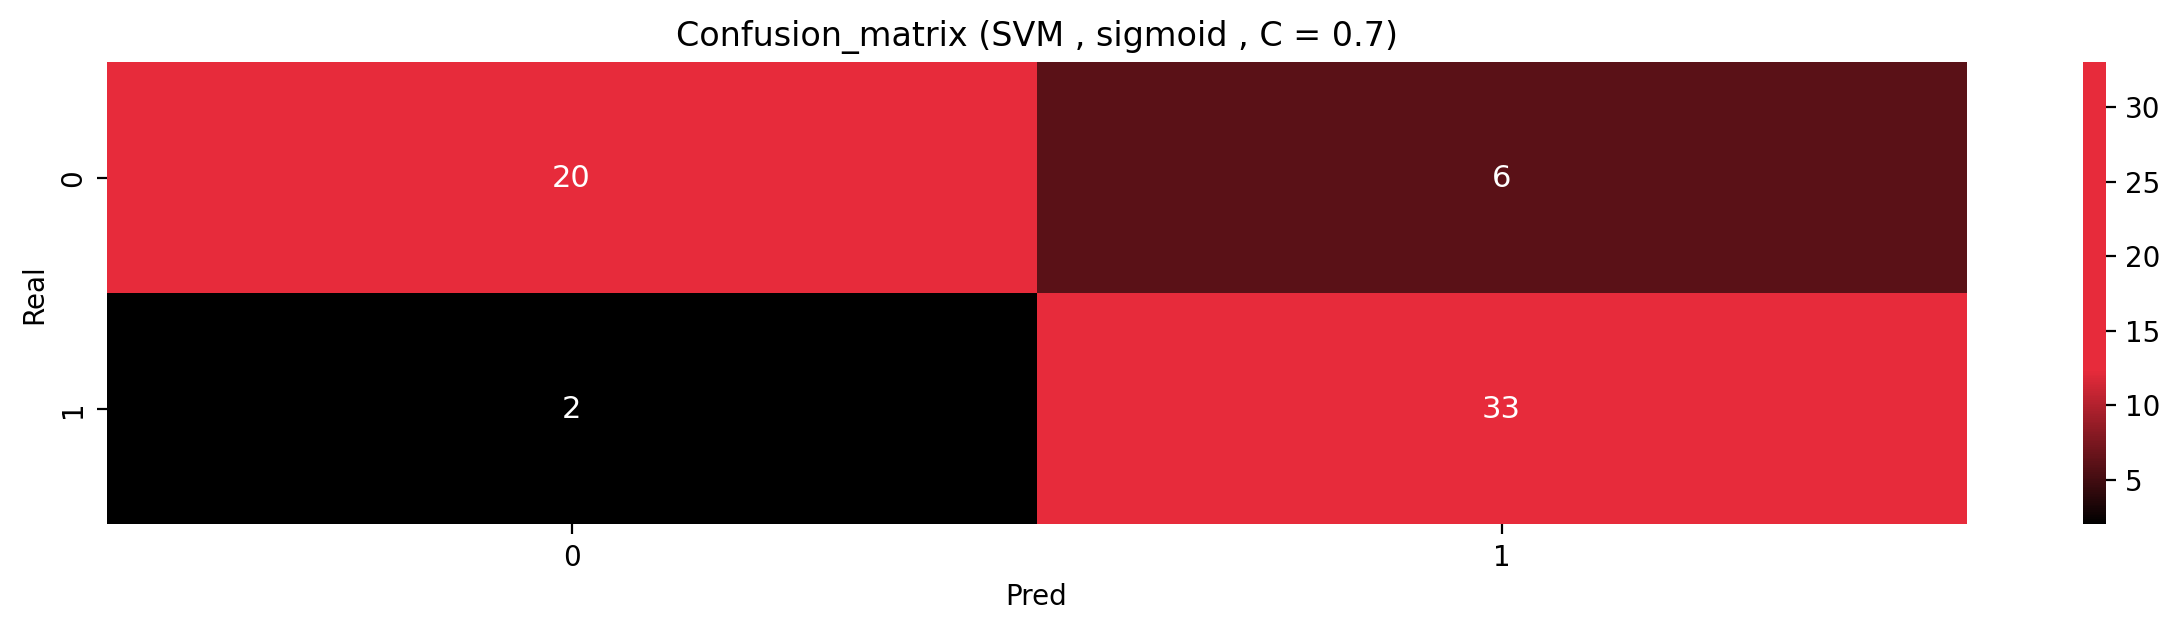

In [31]:
conf_matrix_6 = confusion_matrix(y_test, y_pred_6)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (SVM , sigmoid , C = 0.7)")
annot = np.array([[f"{conf_matrix_6[0, 0]}", f"{conf_matrix_6[0, 1]}"],
                  [f"{conf_matrix_6[1, 0]}", f"{conf_matrix_6[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_6,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [32]:
print(color.BOLD+ "Classification report for clf_3 (Svm, kernel = Linear, C = 20):"+ color.END)
print(classification_report(y_train, clf_3.predict(X_train)))
print(color.BOLD +"Classification report for clf_4 (Svm, kernel = Poly, C = 2):"+ color.END)
print(classification_report(y_train, clf_4.predict(X_train)))
print(color.BOLD+ "Classification report for clf_5 (Svm, kernel = rbf, C = 1):"+ color.END)
print(classification_report(y_train, clf_5.predict(X_train)))
print(color.BOLD +"Classification report for clf_6 (Svm, kernel = Sigmoid, C = 0.7):"+ color.END)
print(classification_report(y_train, clf_6.predict(X_train)))

Classification report for clf_3 (Svm, kernel = Linear, C = 20):
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       112
           1       0.82      0.92      0.86       130

    accuracy                           0.84       242
   macro avg       0.85      0.84      0.84       242
weighted avg       0.85      0.84      0.84       242

Classification report for clf_4 (Svm, kernel = Poly, C = 2):
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       112
           1       0.93      0.95      0.94       130

    accuracy                           0.93       242
   macro avg       0.93      0.93      0.93       242
weighted avg       0.93      0.93      0.93       242

Classification report for clf_5 (Svm, kernel = rbf, C = 1):
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       112
           1       0.85      0.92      0.88       13

# Random Forest

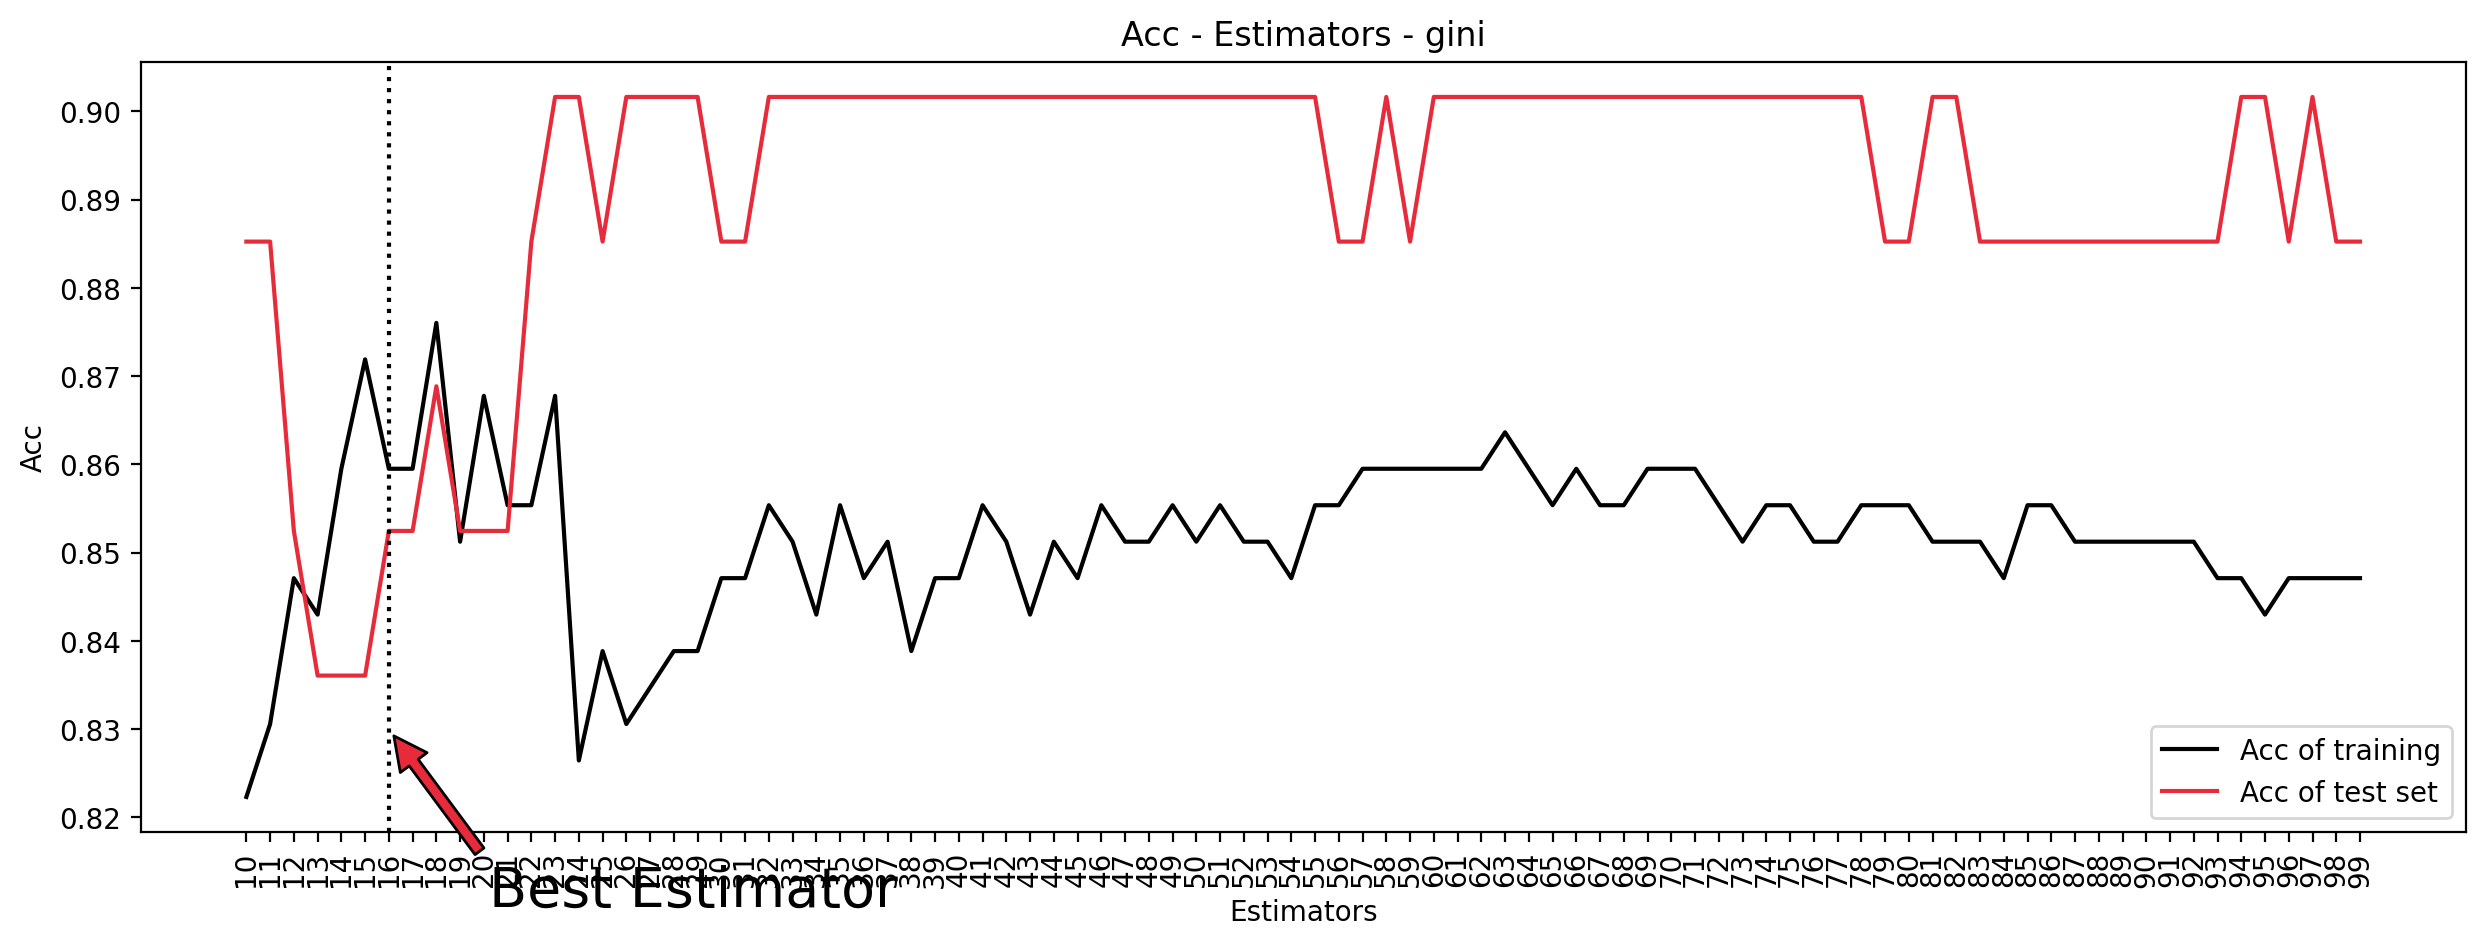

In [33]:
training_acc_10 = []
test_acc_10 = []

n_estimators = range(10,100)
#Criterion = gini, entropy

for estimator in n_estimators:
    RF = RandomForestClassifier(n_estimators= estimator, criterion= 'gini', random_state=40, max_depth= 2)
    RF.fit (X_train, y_train.ravel())
    training_acc_10.append(RF.score(X_train,y_train))
    test_acc_10.append(RF.score(X_test, y_test))
    
    
plt.figure(figsize=(15,5), dpi=200)    
plt.plot(n_estimators, training_acc_10, label='Acc of training', color= 'black')
plt.plot(n_estimators, test_acc_10, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Estimators')
plt.title('Acc - Estimators - gini')
plt.legend()
plt.xticks(range(10,100), rotation=90)
plt.annotate('Best Estimator', xy=(16,0.83),xytext=(20.2,0.81), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x =16, linestyle= 'dotted', c= 'black')
plt.show();

In [34]:
clf_10 = RandomForestClassifier(max_depth = 2, criterion= 'gini', random_state=40, n_estimators= 16)
clf_10.fit(X_train, y_train.ravel())
y_pred_10 = clf_10.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_10))
Best_RF = metrics.accuracy_score(y_test,y_pred_10)

Accuracy 0.8524590163934426


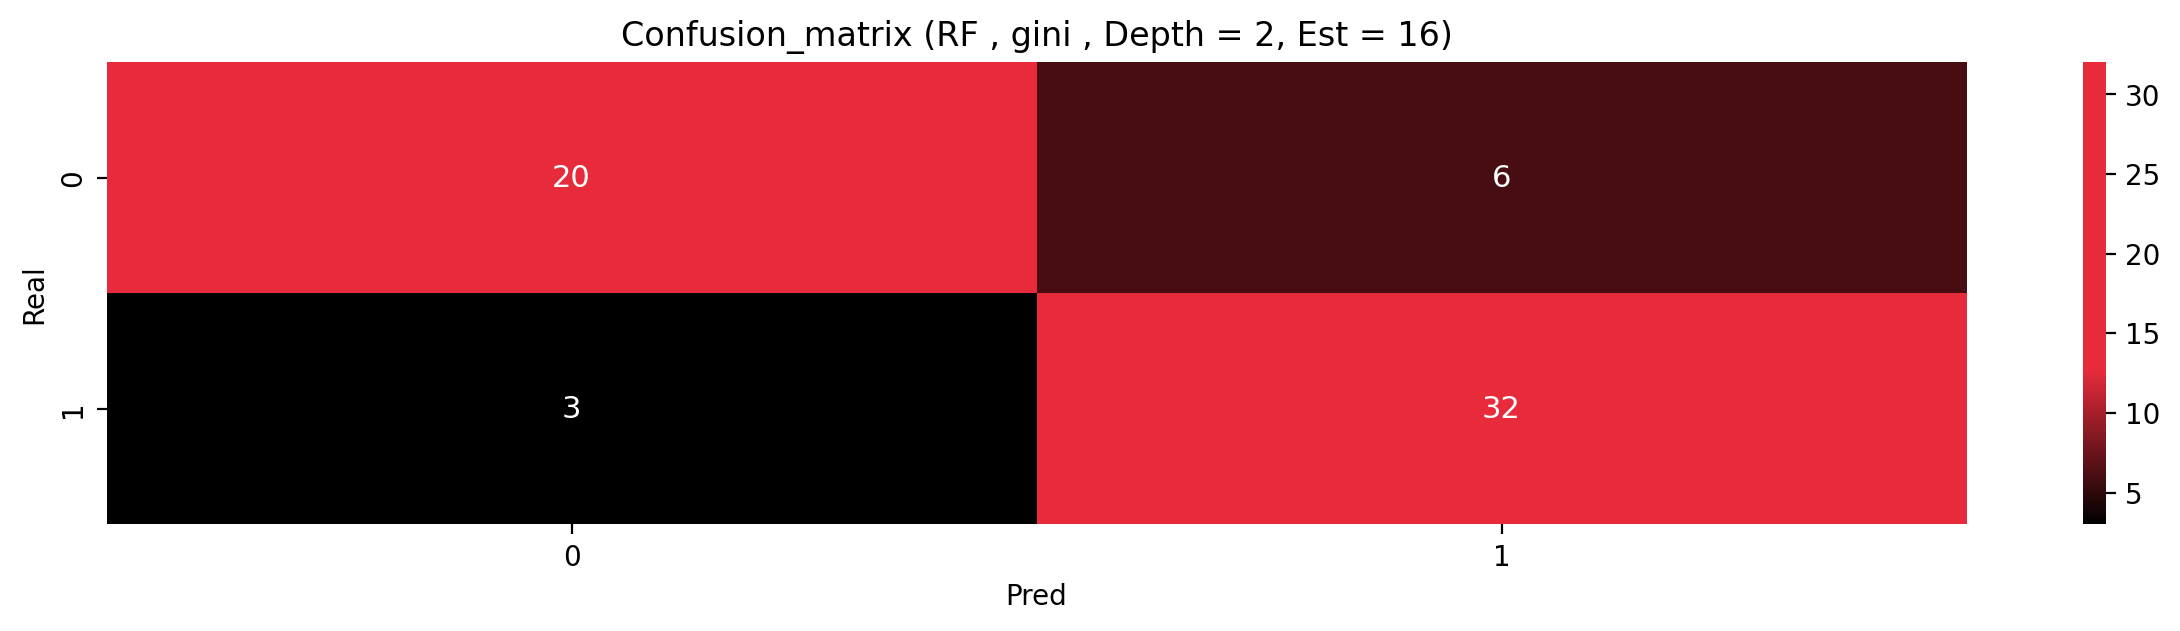

In [35]:
conf_matrix_10 = confusion_matrix(y_test, y_pred_10)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (RF , gini , Depth = 2, Est = 16)")
annot = np.array([[f"{conf_matrix_10[0, 0]}", f"{conf_matrix_10[0, 1]}"],
                  [f"{conf_matrix_10[1, 0]}", f"{conf_matrix_10[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_10,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

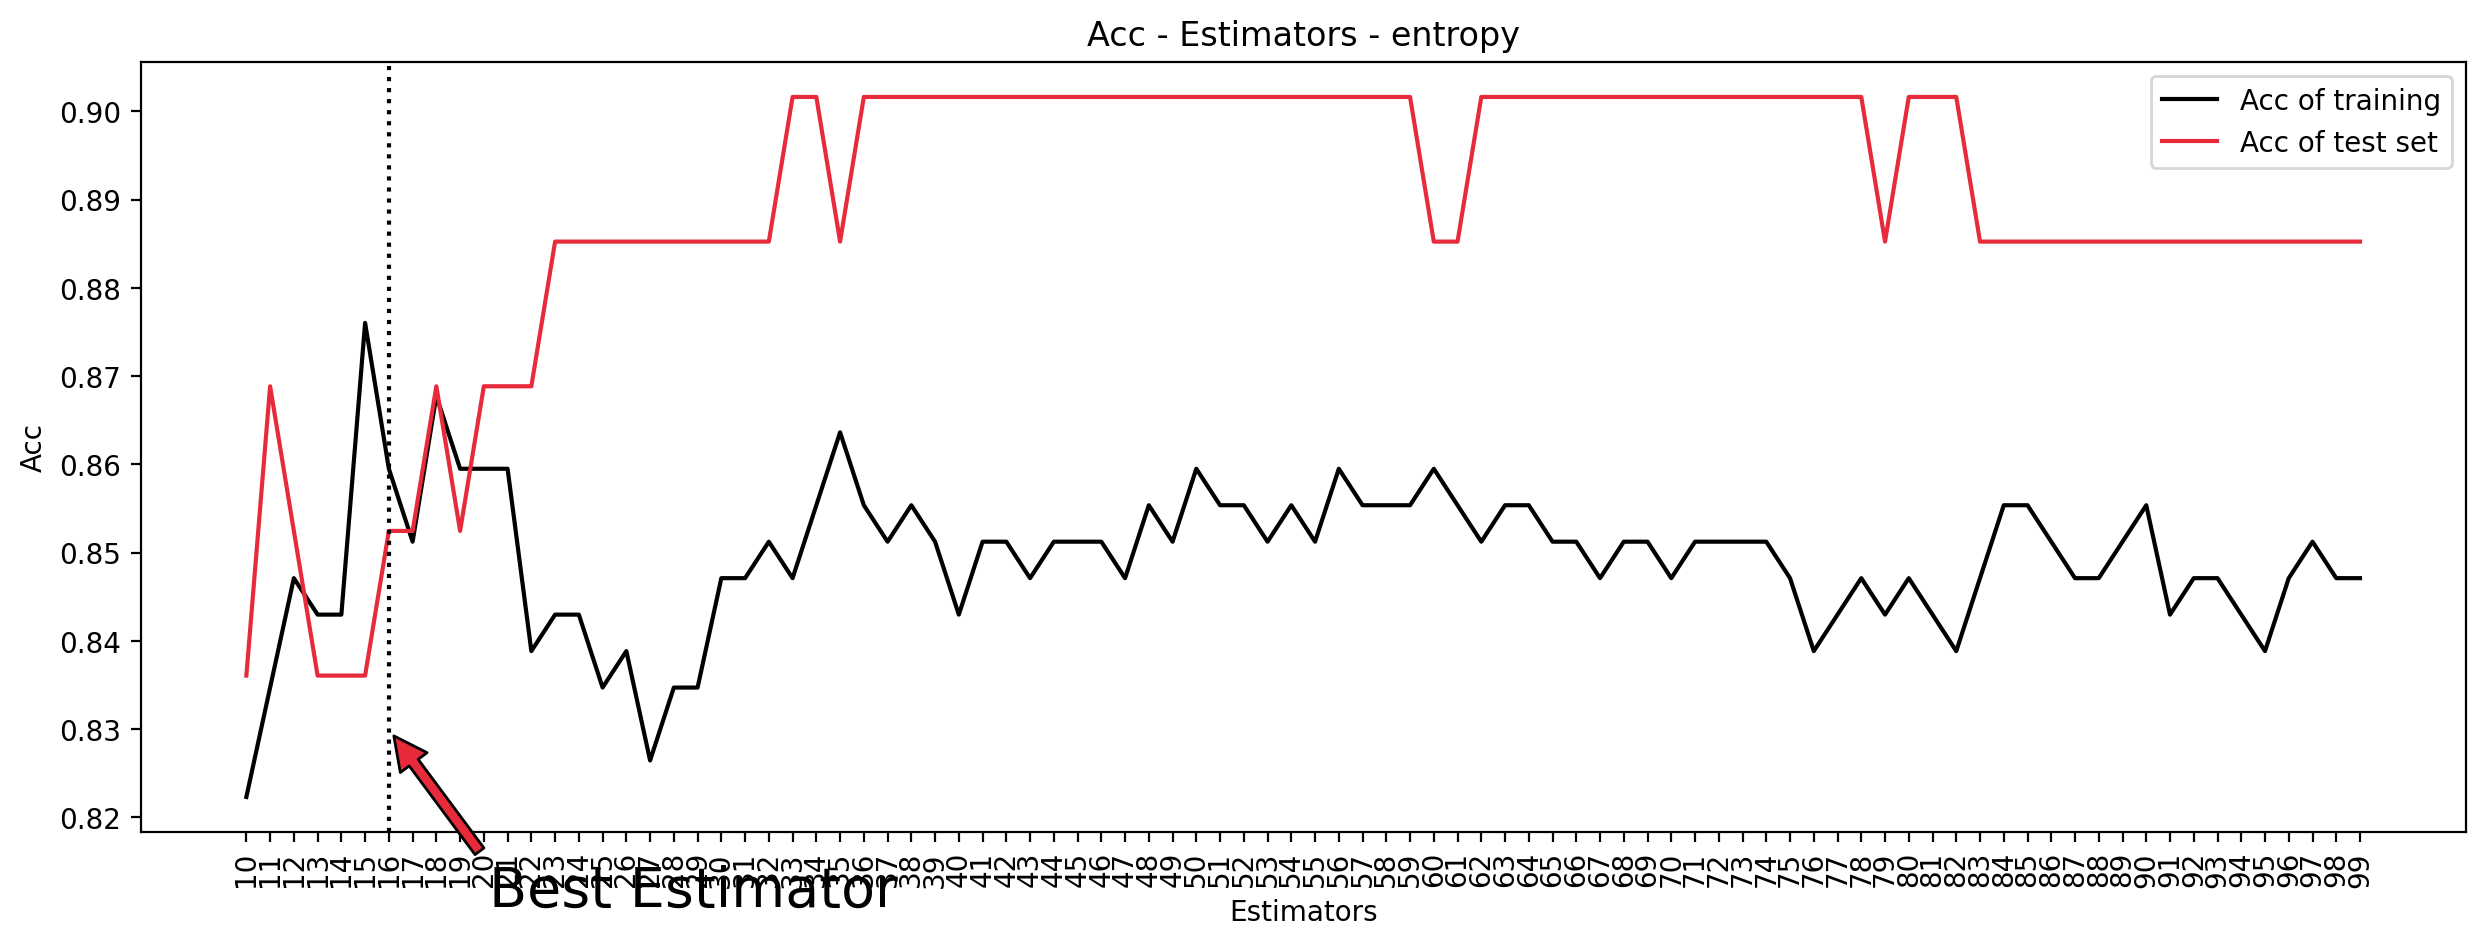

In [36]:
training_acc_11 = []
test_acc_11 = []

n_estimators = range(10,100)
#Criterion = gini, entropy

for estimator in n_estimators:
    RF = RandomForestClassifier(n_estimators= estimator, criterion= 'entropy', random_state=40, max_depth= 2)
    RF.fit (X_train, y_train.ravel())
    training_acc_11.append(RF.score(X_train,y_train))
    test_acc_11.append(RF.score(X_test, y_test))
    
    
plt.figure(figsize=(15,5), dpi=200)    
plt.plot(n_estimators, training_acc_11, label='Acc of training', color= 'black')
plt.plot(n_estimators, test_acc_11, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Estimators')
plt.title('Acc - Estimators - entropy')
plt.legend()
plt.xticks(range(10,100), rotation=90)
plt.annotate('Best Estimator', xy=(16,0.83),xytext=(20.2,0.81), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x =16, linestyle= 'dotted', c= 'black')
plt.show()

In [37]:
clf_11 = RandomForestClassifier(max_depth = 2, criterion= 'entropy', random_state=40, n_estimators= 16)
clf_11.fit(X_train, y_train.ravel())
y_pred_11 = clf_11.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_11))

Accuracy 0.8524590163934426


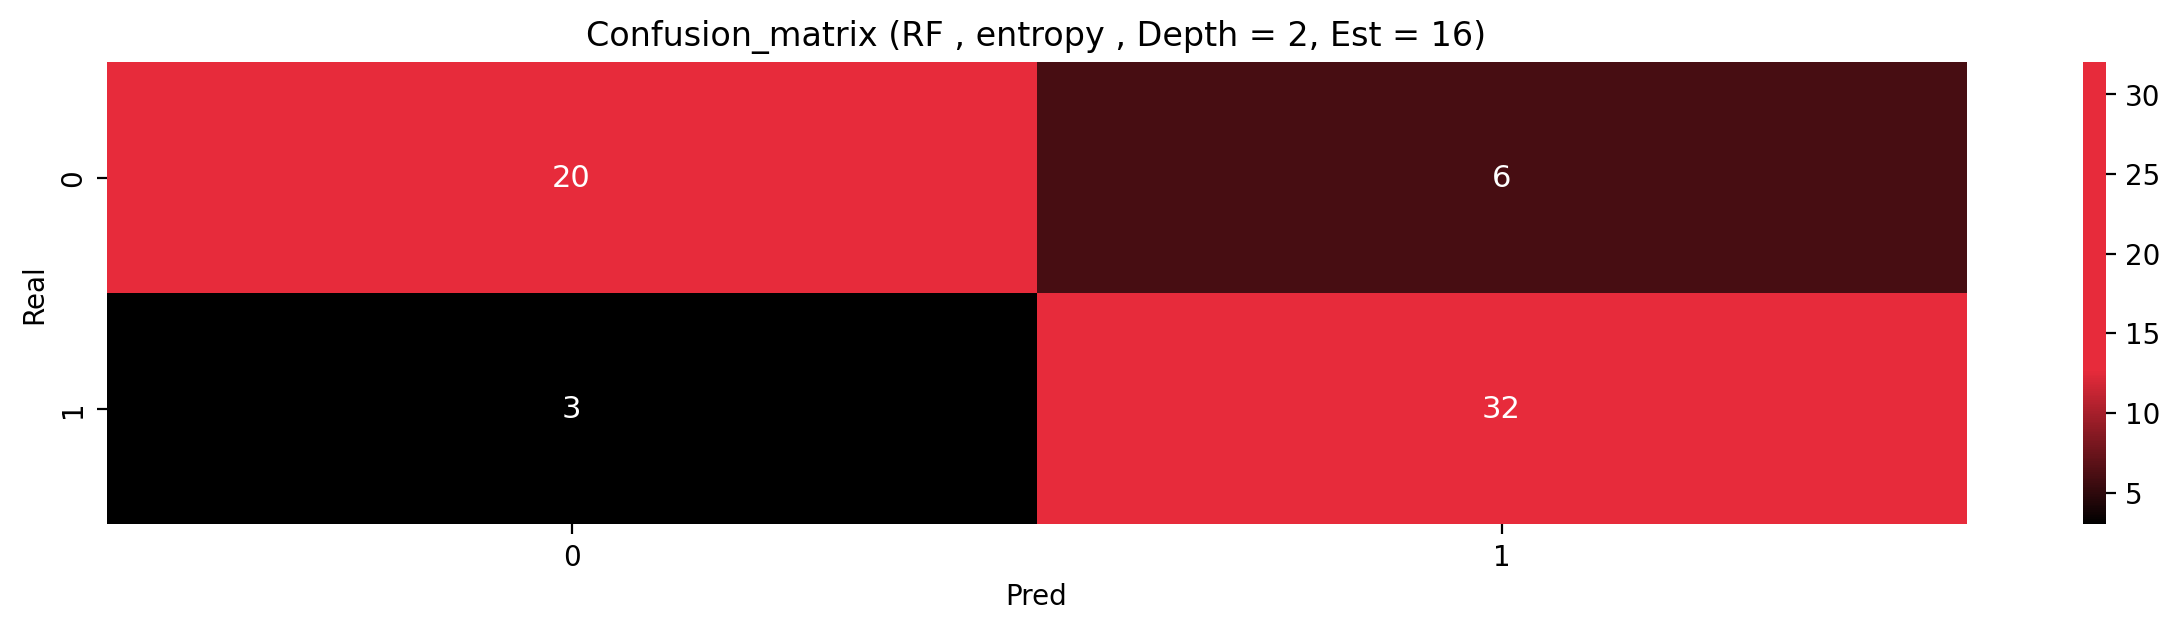

In [38]:
conf_matrix_11 = confusion_matrix(y_test, y_pred_11)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (RF , entropy , Depth = 2, Est = 16)")
annot = np.array([[f"{conf_matrix_11[0, 0]}", f"{conf_matrix_11[0, 1]}"],
                  [f"{conf_matrix_11[1, 0]}", f"{conf_matrix_11[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_11,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [39]:
print("Classification report for clf_10 (RF, criterion = gini, Depth = 2, N_Estimators = 16):")
print(classification_report(y_train, clf_10.predict(X_train)))
print("Classification report for clf_11 (RF, criterion = entropy, Depth = 2, N_Estimators = 16):")
print(classification_report(y_train, clf_11.predict(X_train)))

Classification report for clf_10 (RF, criterion = gini, Depth = 2, N_Estimators = 16):
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       112
           1       0.85      0.90      0.87       130

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242

Classification report for clf_11 (RF, criterion = entropy, Depth = 2, N_Estimators = 16):
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       112
           1       0.85      0.90      0.87       130

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



# Descision Tree

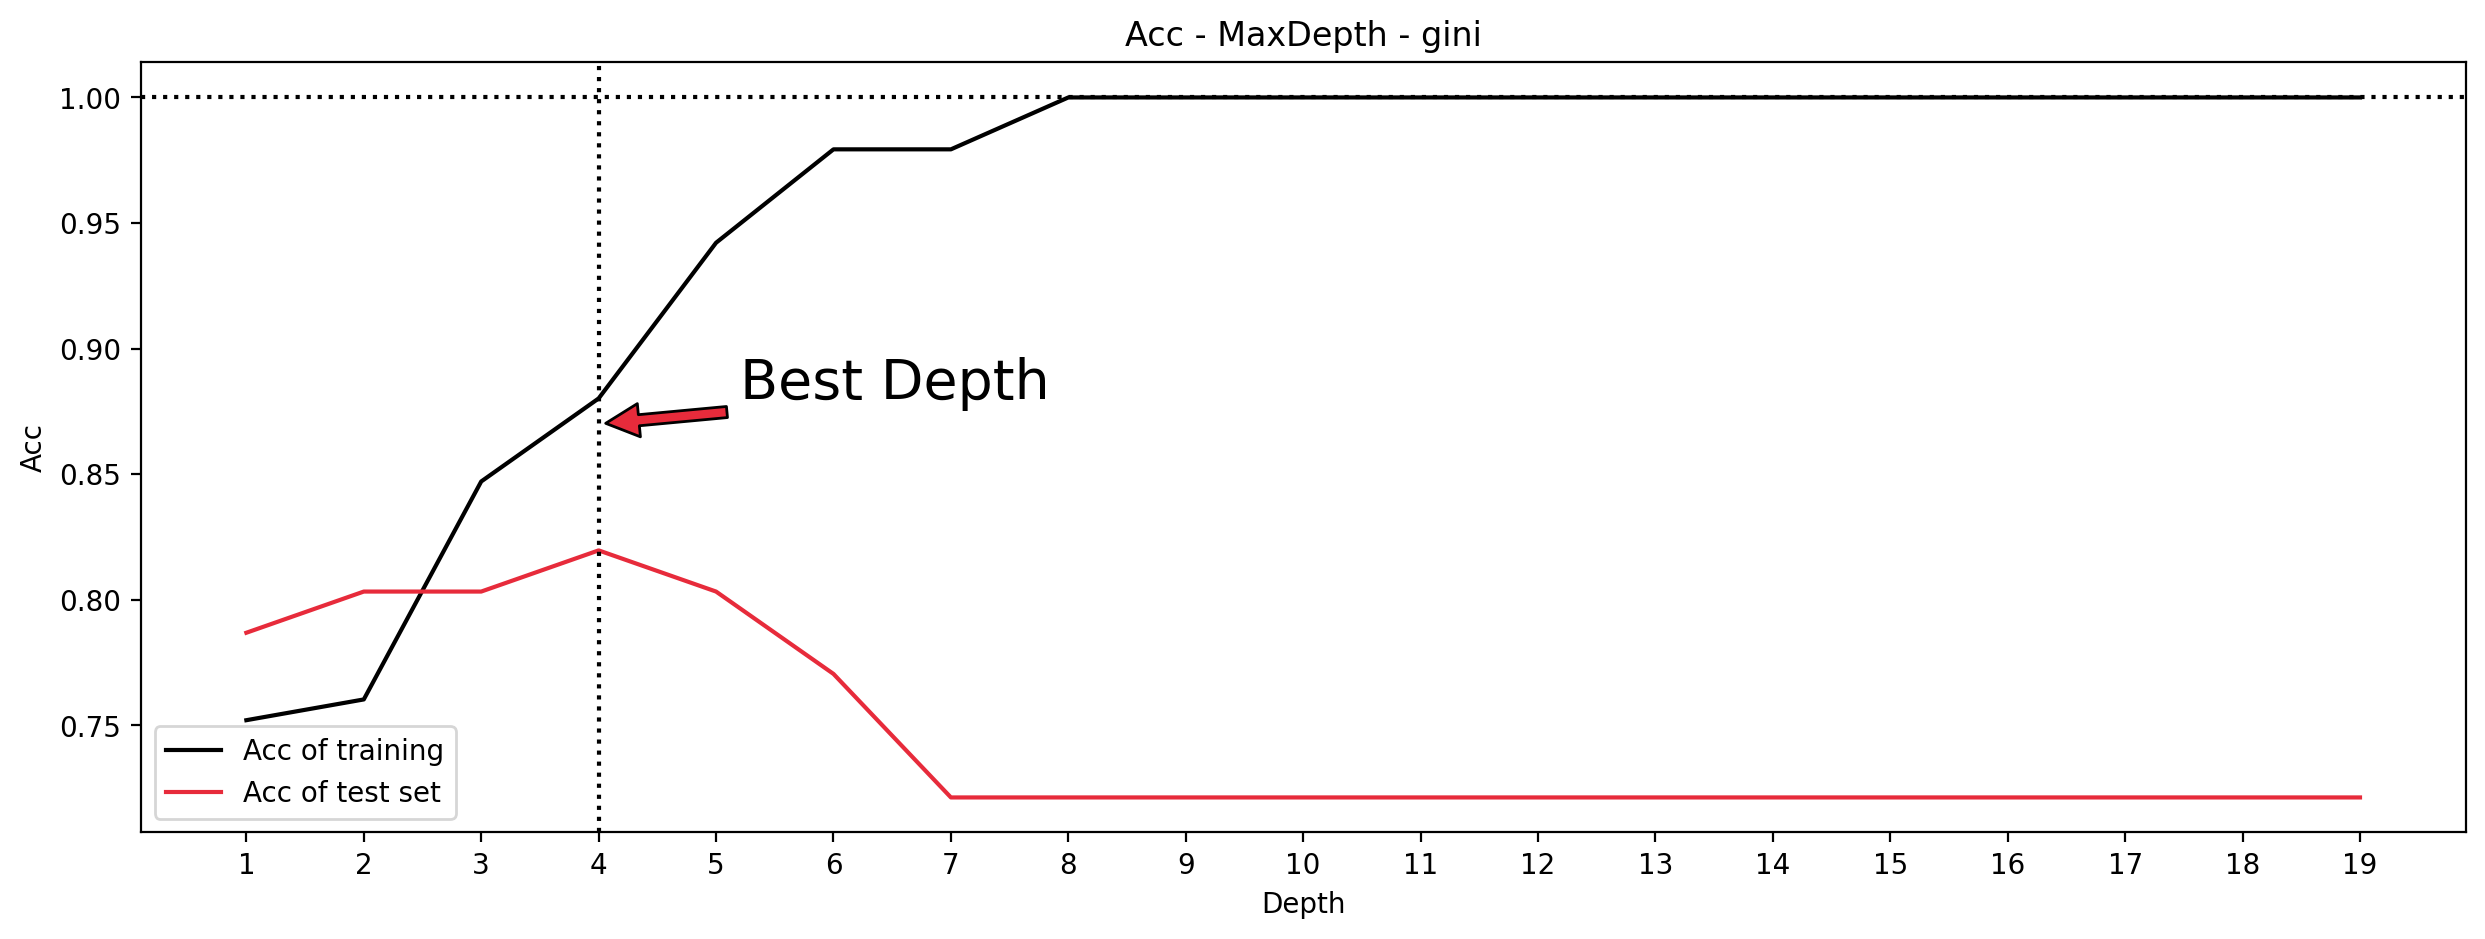

In [40]:
training_acc_7 = []
test_acc_7 = []

max_depth = range(1,20)
#Criterion = gini, entropy, log_loss

for depth in max_depth:
    DT = DecisionTreeClassifier(max_depth= depth, criterion= 'gini', random_state=40)
    DT.fit (X_train, y_train.ravel())
    training_acc_7.append(DT.score(X_train,y_train))
    test_acc_7.append(DT.score(X_test, y_test))
    
    
plt.figure(figsize=(15,5), dpi=200)    
plt.plot(max_depth, training_acc_7, label='Acc of training', color= 'black')
plt.plot(max_depth, test_acc_7, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Depth')
plt.title('Acc - MaxDepth - gini')
plt.legend()
plt.xticks(range(1,20))
plt.annotate('Best Depth', xy=(4,0.87),xytext=(5.2,0.88), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x =4, linestyle= 'dotted', c= 'black')
plt.axhline(y =1, linestyle= 'dotted', c= 'black')
plt.show();

In [41]:
clf_7 = DecisionTreeClassifier(max_depth = 4 , criterion= 'gini', random_state=40)
clf_7.fit(X_train, y_train.ravel())
y_pred_7 = clf_7.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_7))

Accuracy 0.819672131147541


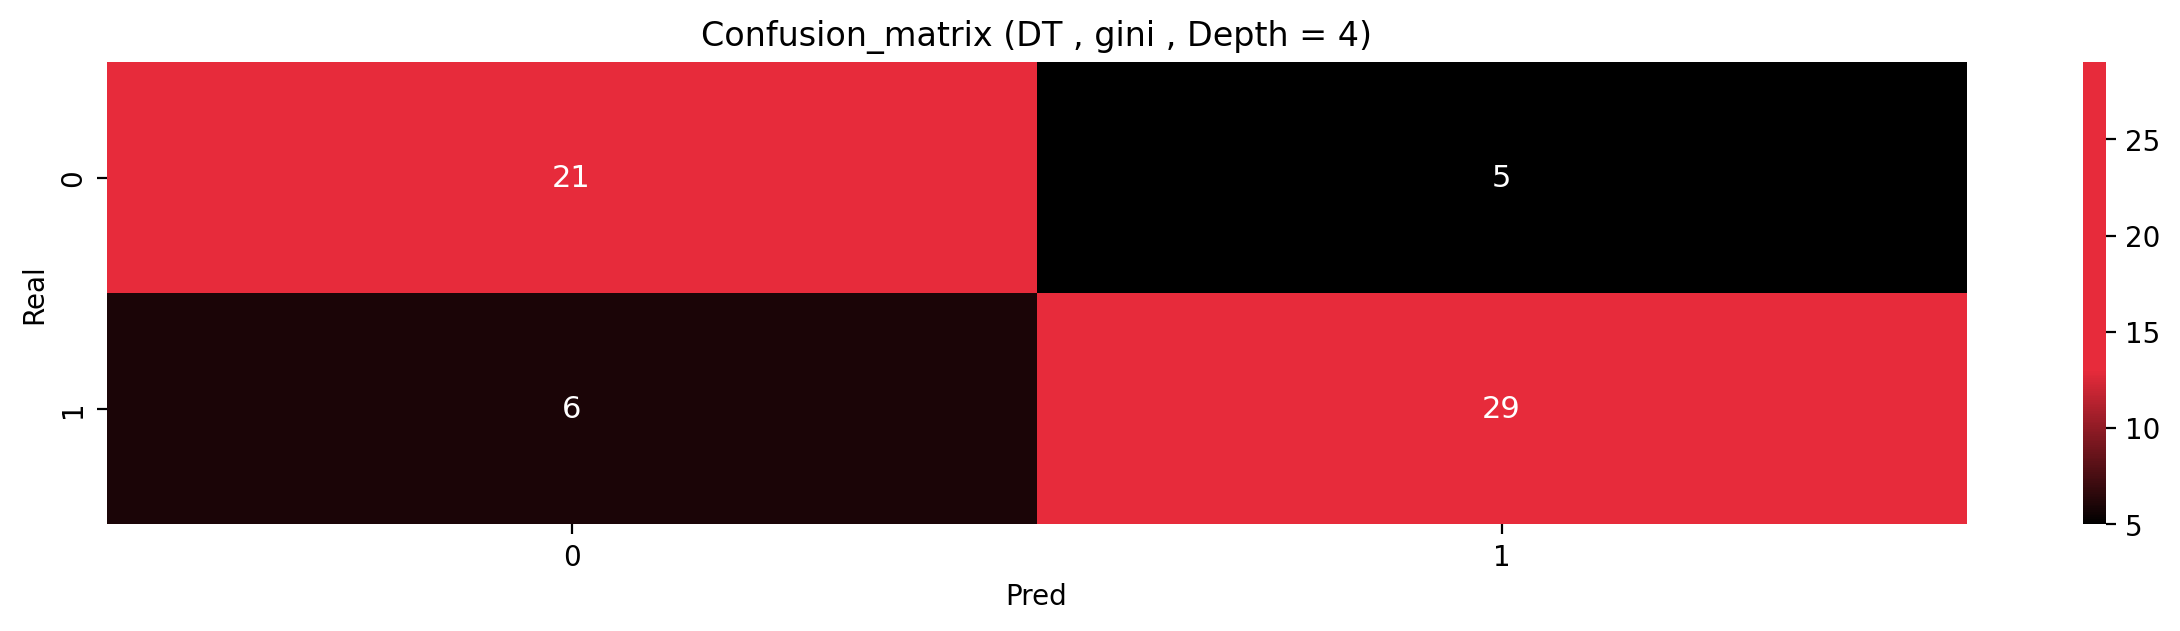

In [42]:
conf_matrix_7 = confusion_matrix(y_test, y_pred_7)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (DT , gini , Depth = 4)")
annot = np.array([[f"{conf_matrix_7[0, 0]}", f"{conf_matrix_7[0, 1]}"],
                  [f"{conf_matrix_7[1, 0]}", f"{conf_matrix_7[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_7,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

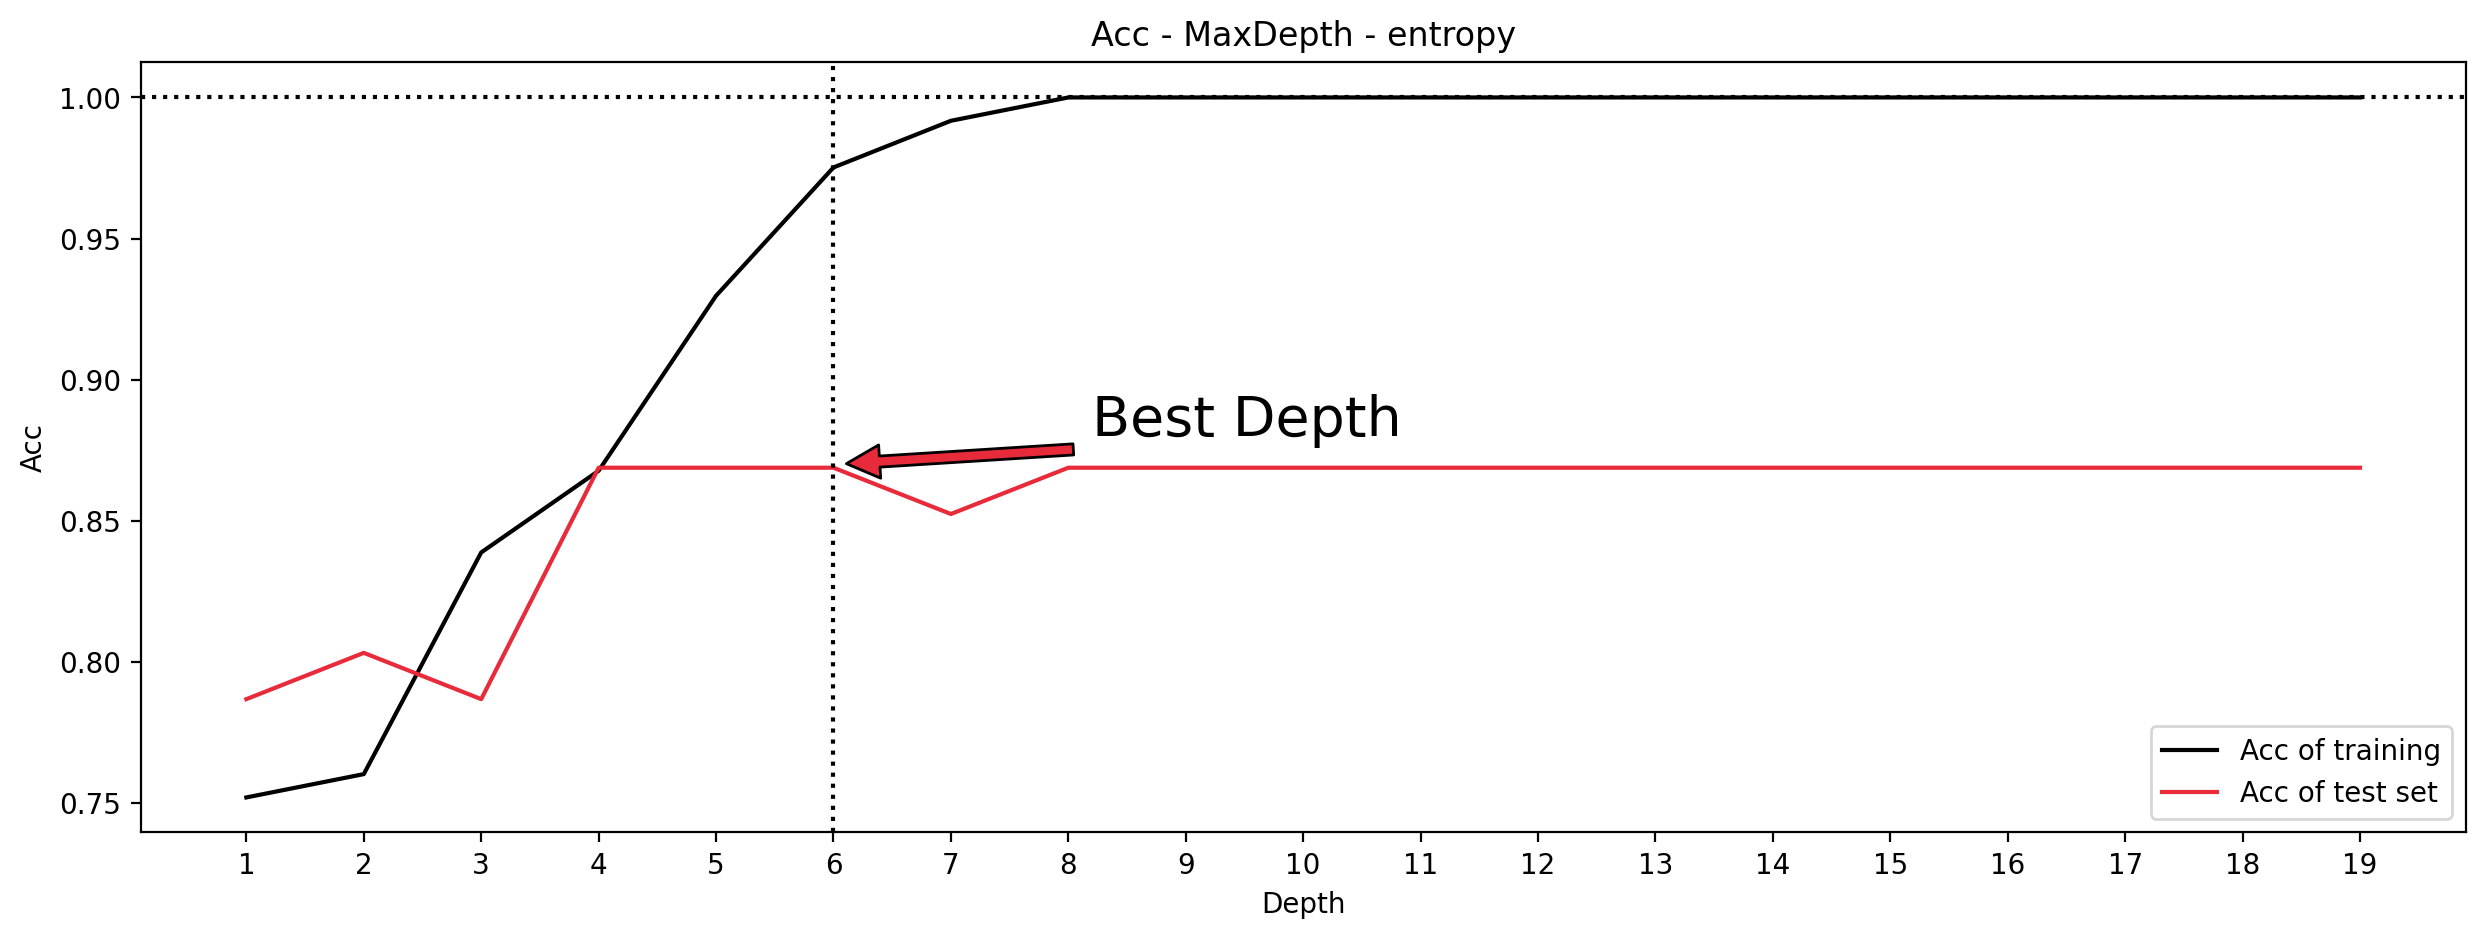

In [43]:
training_acc_8 = []
test_acc_8 = []

max_depth = range(1,20)
#Criterion = gini, entropy, log_loss

for depth in max_depth:
    DT = DecisionTreeClassifier(max_depth= depth, criterion= 'entropy', random_state=5)
    DT.fit (X_train, y_train.ravel())
    training_acc_8.append(DT.score(X_train,y_train))
    test_acc_8.append(DT.score(X_test, y_test))
    
    
plt.figure(figsize=(15,5), dpi=200)    
plt.plot(max_depth, training_acc_8, label='Acc of training', color= 'black')
plt.plot(max_depth, test_acc_8, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Depth')
plt.title('Acc - MaxDepth - entropy')
plt.legend()
plt.xticks(range(1,20))
plt.annotate('Best Depth', xy=(6,0.87),xytext=(8.2,0.88), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x =6, linestyle= 'dotted', c= 'black')
plt.axhline(y =1, linestyle= 'dotted', c= 'black')
plt.show();

In [44]:
clf_8 = DecisionTreeClassifier(max_depth = 6, criterion= 'entropy', random_state=5)
clf_8.fit(X_train, y_train.ravel())
y_pred_8 = clf_8.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_8))
Best_DT = metrics.accuracy_score(y_test,y_pred_8)

Accuracy 0.8688524590163934


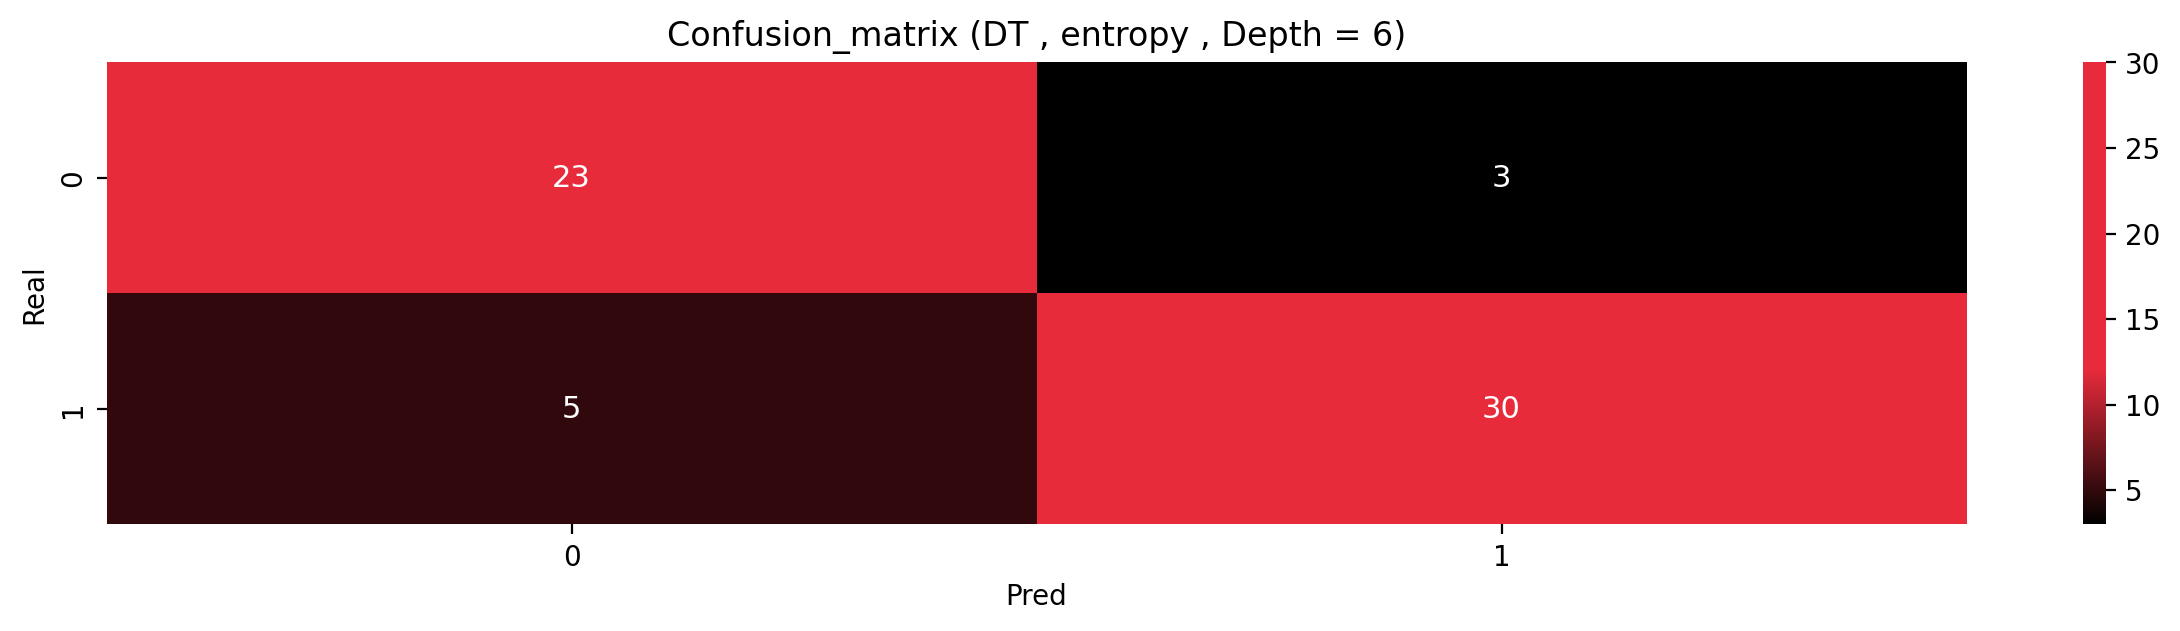

In [45]:
conf_matrix_8 = confusion_matrix(y_test, y_pred_8)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (DT , entropy , Depth = 6)")
annot = np.array([[f"{conf_matrix_8[0, 0]}", f"{conf_matrix_8[0, 1]}"],
                  [f"{conf_matrix_8[1, 0]}", f"{conf_matrix_8[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_8,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()


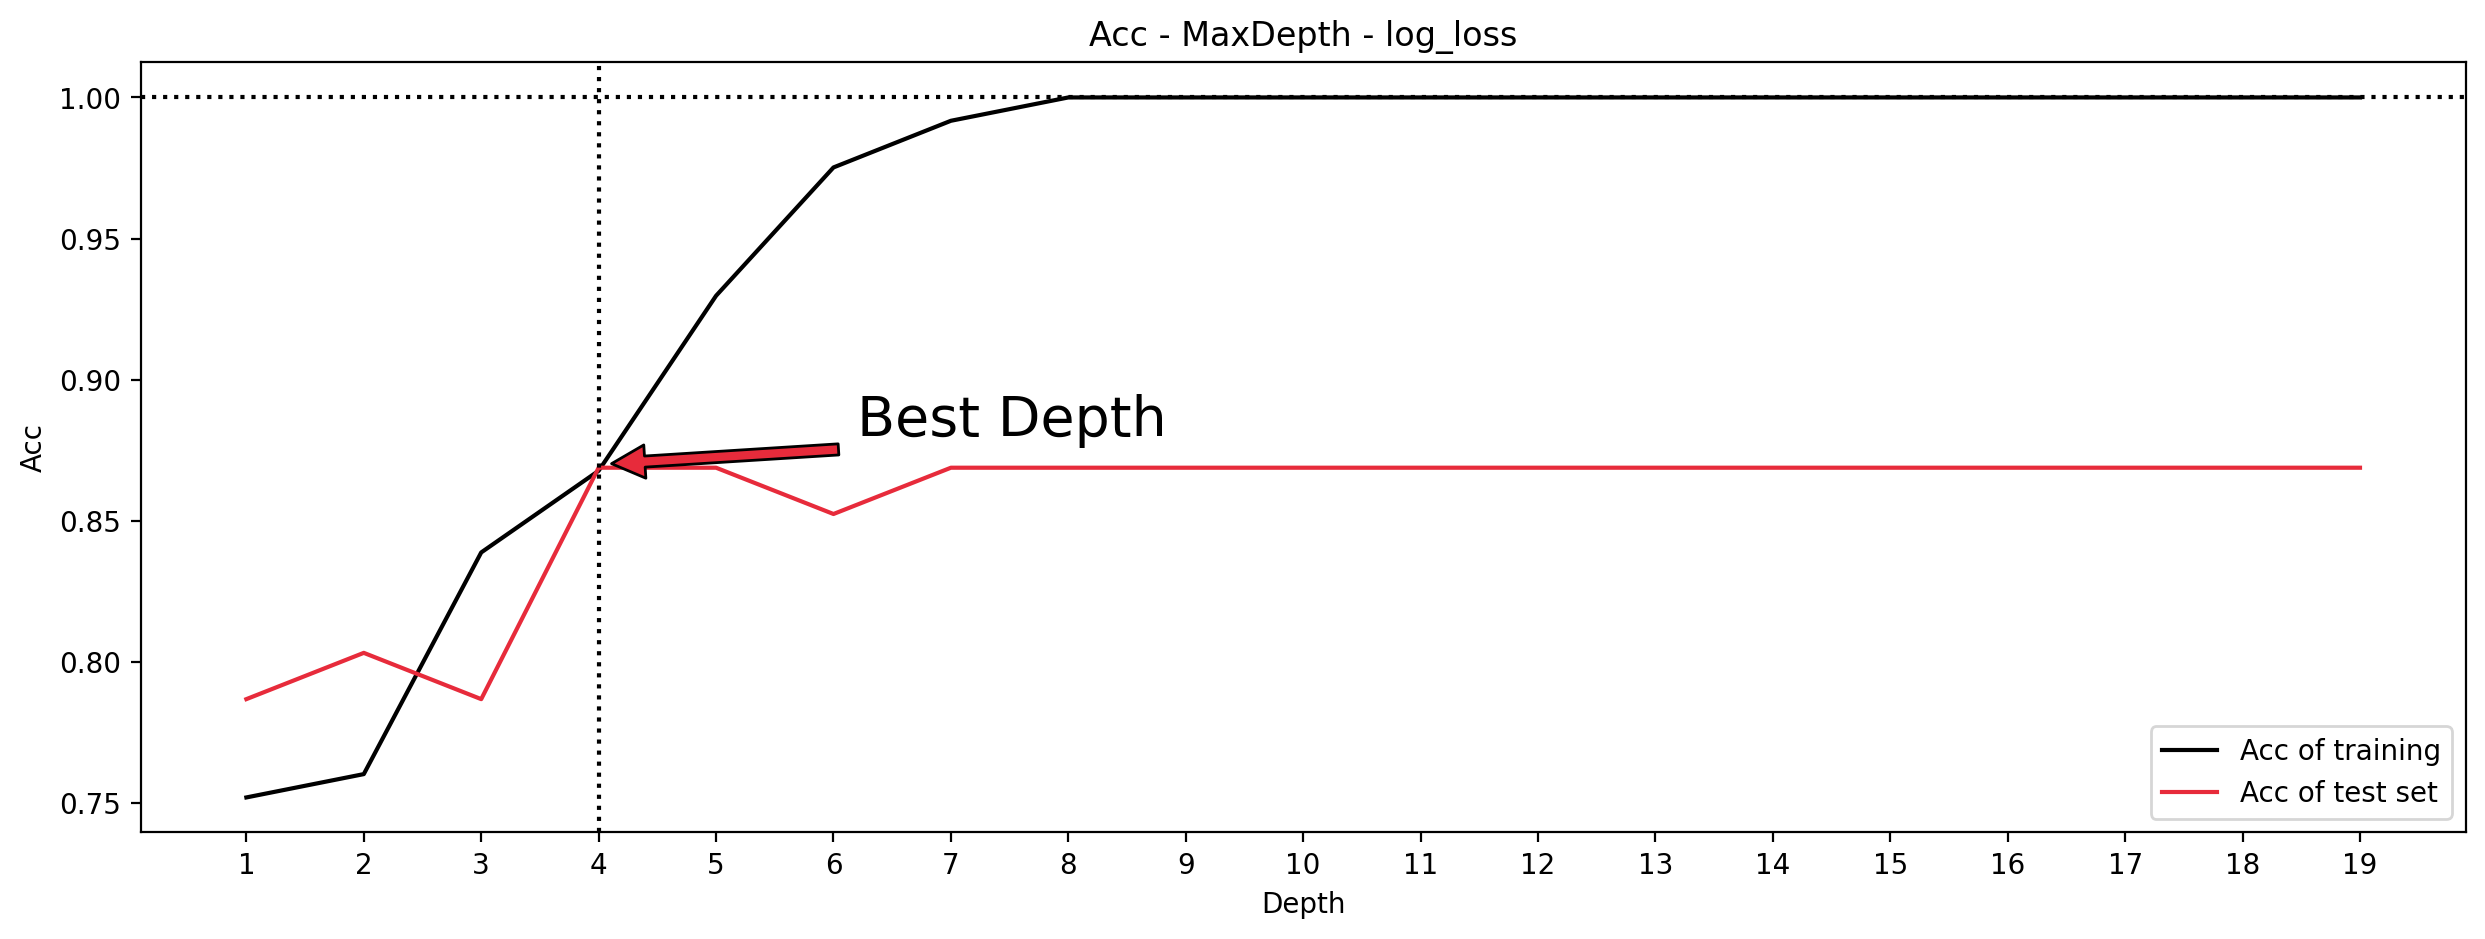

In [46]:
training_acc_9 = []
test_acc_9 = []

max_depth = range(1,20)
#Criterion = gini, entropy, log_loss

for depth in max_depth:
    DT = DecisionTreeClassifier(max_depth= depth, criterion= 'log_loss', random_state=4)
    DT.fit (X_train, y_train.ravel())
    training_acc_9.append(DT.score(X_train,y_train))
    test_acc_9.append(DT.score(X_test, y_test))
    
    
plt.figure(figsize=(15,5), dpi=200)    
plt.plot(max_depth, training_acc_9, label='Acc of training', color= 'black')
plt.plot(max_depth, test_acc_9, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Depth')
plt.title('Acc - MaxDepth - log_loss')
plt.legend()
plt.xticks(range(1,20))
plt.annotate('Best Depth', xy=(4,0.87),xytext=(6.2,0.88), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x =4, linestyle= 'dotted', c= 'black')
plt.axhline(y =1, linestyle= 'dotted', c= 'black')
plt.show();


In [47]:
clf_9 = DecisionTreeClassifier(max_depth = 4, criterion= 'log_loss', random_state=4)
clf_9.fit(X_train, y_train.ravel())
y_pred_9 = clf_9.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_9))

Accuracy 0.8688524590163934


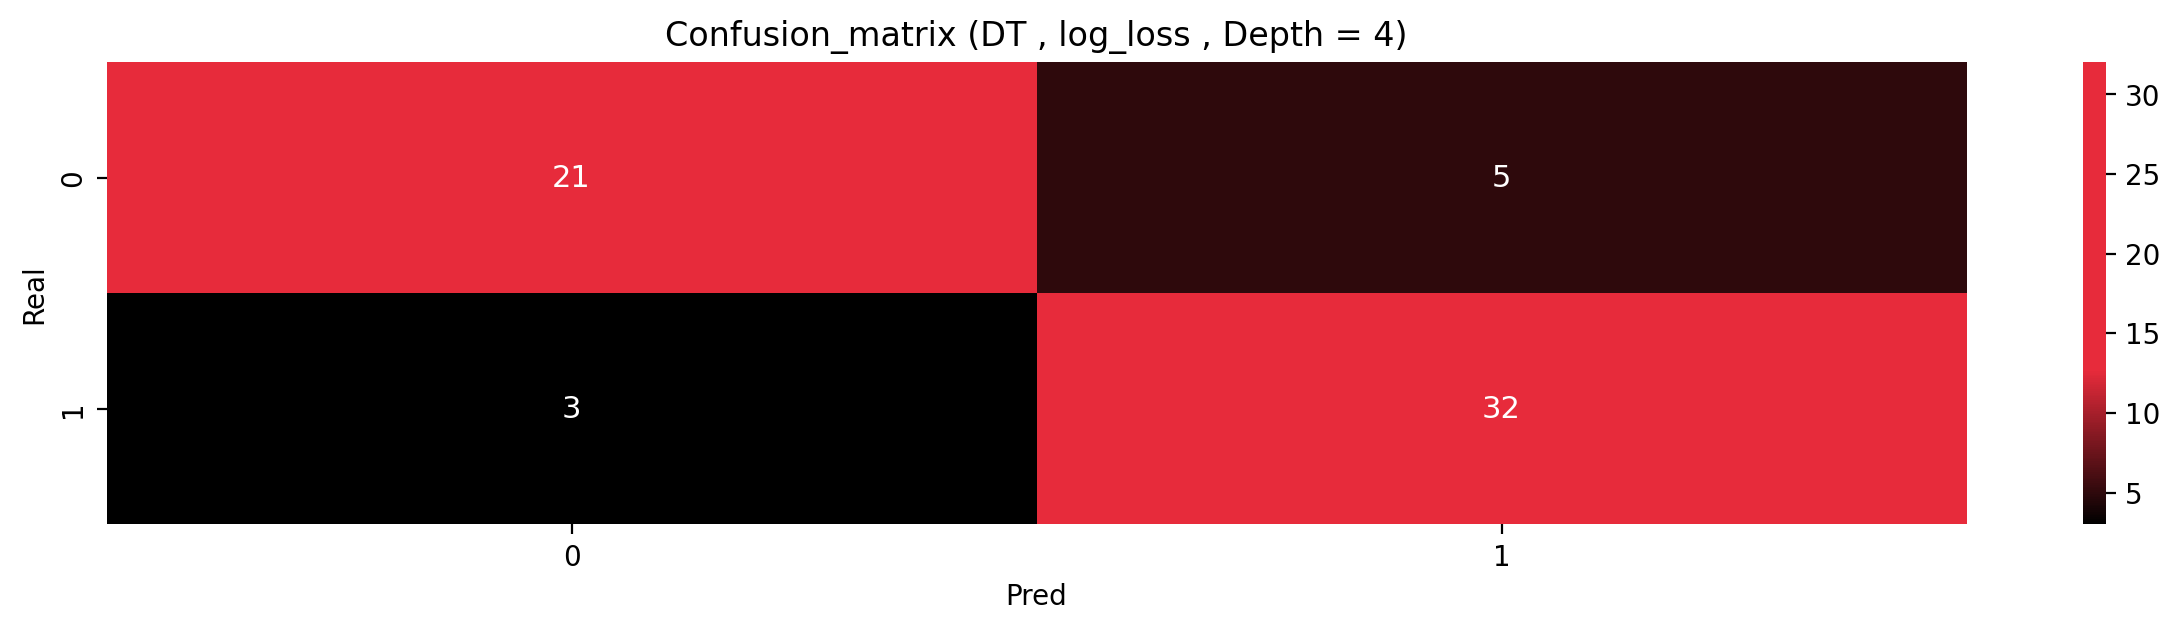

In [48]:
conf_matrix_9 = confusion_matrix(y_test, y_pred_9)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (DT , log_loss , Depth = 4)")
annot = np.array([[f"{conf_matrix_9[0, 0]}", f"{conf_matrix_9[0, 1]}"],
                  [f"{conf_matrix_9[1, 0]}", f"{conf_matrix_9[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_9,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [49]:
print("Classification report for clf_7 (DT, criterion = gini, Depth = 4):")
print(classification_report(y_train, clf_7.predict(X_train)))
print("Classification report for clf_8 (DT, criterion = entropy, Depth = 6):")
print(classification_report(y_train, clf_8.predict(X_train)))
print("Classification report for clf_9 (DT, criterion = log_loss, Depth = 4):")
print(classification_report(y_train, clf_9.predict(X_train)))

Classification report for clf_7 (DT, criterion = gini, Depth = 4):
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       112
           1       0.87      0.92      0.89       130

    accuracy                           0.88       242
   macro avg       0.88      0.88      0.88       242
weighted avg       0.88      0.88      0.88       242

Classification report for clf_8 (DT, criterion = entropy, Depth = 6):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       112
           1       0.98      0.97      0.98       130

    accuracy                           0.98       242
   macro avg       0.97      0.98      0.98       242
weighted avg       0.98      0.98      0.98       242

Classification report for clf_9 (DT, criterion = log_loss, Depth = 4):
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       112
           1       0.84      

# Conclusion

* As mentioned before, The samples in this dataset are really few. Because of that, Random forest and Decision trees didn't work well on this dataset.
 Instead of that, SVM and KNN worked well. So let's take a quick view on the comparison between each algorithm.

In [50]:
Best_models = pd.DataFrame({'Best_models_acc': [Best_DT, Best_knn, Best_RF, Best_SVM],
               'Best_models_name': ('Decision tree', 'KNN', 'Random Forest','SVM')})
Best_models.sort_values(by='Best_models_acc',ascending=False ,inplace = True)
Best_models

,Best_models_acc,Best_models_name
3,0.901639,SVM
0,0.868852,Decision tree
1,0.868852,KNN
2,0.852459,Random Forest


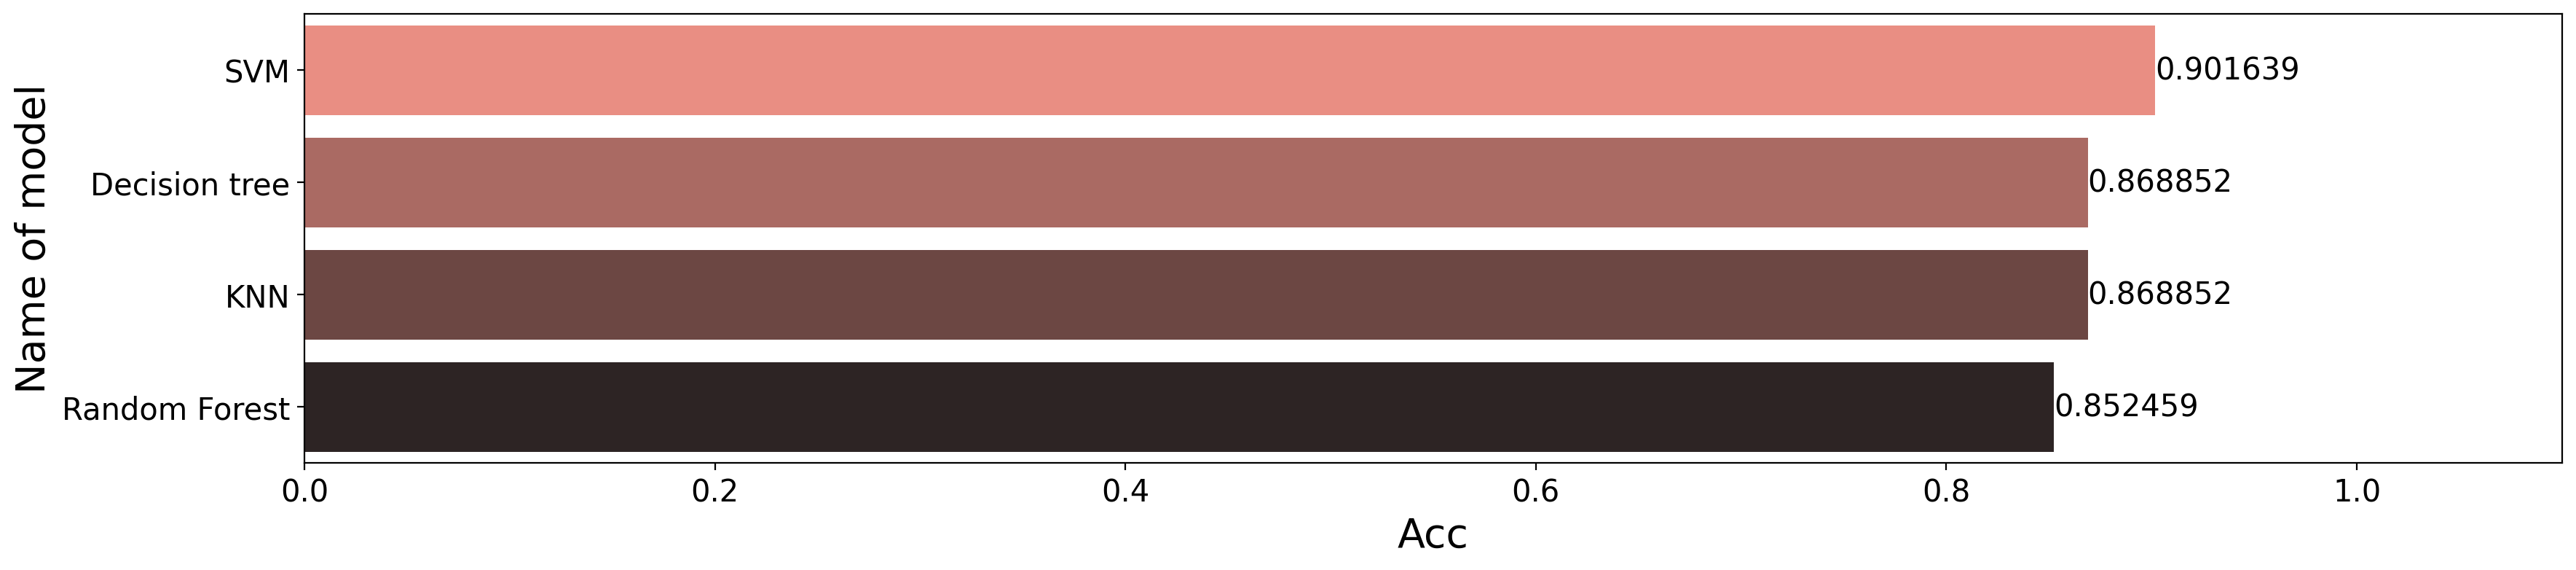

In [51]:
plt.figure(figsize=(20,4),dpi=200)
ax = sns.barplot(x= Best_models['Best_models_acc'], y= Best_models['Best_models_name'], palette="dark:salmon_r")
ax.bar_label(ax.containers[0],fontsize=15)
plt.xlabel("Acc",fontsize=20)
plt.ylabel("Name of model", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_xlim([0, 1.1])
plt.show()

# Saving The Model

In [53]:
import joblib

In [54]:
# Save the model to a file
joblib.dump(clf_3, 'svm_model.pkl')

['svm_model.pkl']

## Now trying to load the model:

In [55]:
loaded_model = joblib.load('svm_model.pkl')

In [56]:
ht.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
ht.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 13 inputs each having (302) values:
- age :
    - mean = 54.366337 , std = 9.082101 , min = 0 , max = 77
- sex :
    - mean = 0.683168, std = 0.466011, min = 0, max = 1
-  cp :
    - mean = 0.966997, std = 1.032052, min = 0, max = 3
- trtbps :
    - mean = 131.623762, std = 17.538143, min = 94.0, max = 200
- chol :
    - mean = 246.264026, std = 51.830751, min = 126.00, max = 564
- fbs :
    - mean = 0.148515, std = 0.356198, min = 0 , max = 1
- restecg :
    - mean = 0.528053, std = 0.525860, min =0 , max = 2
- thalachh :
    - mean = 149.646865, std = 22.905161, min = 71.0, max = 202
- exng :
    - mean = 0.326733, std = 0.469794, min = 0, max = 1
- oldpeak :
    - mean = 1.039604, std = 1.161075, min = 0, max = 6.2
- slp :
    - mean = 1.399340, std = 0.616226, min = 0, max = 2
- caa :
    - mean = 0.729373, std = 1.022606, min = 0, max = 4
- thall :
    - mean = 2.313531, std = 0.612277, min = 0, max = 3


In [138]:
var_data = {
    'age': {'mean': 54.366337, 'std': 9.082101, 'min': 29, 'max': 77}, 
    'sex': {'mean': 0.683168, 'std': 0.466011, 'min': 0, 'max': 1}, 
    'cp': {'mean': 0.966997, 'std': 1.032052, 'min': 0, 'max': 3}, 
    'trtbps': {'mean': 131.623762, 'std': 17.538143, 'min': 94.0, 'max': 200}, 
    'chol': {'mean': 246.264026, 'std': 51.830751, 'min': 126.0, 'max': 564}, 
    'fbs': {'mean': 0.148515, 'std': 0.356198, 'min': 0, 'max': 1}, 
    'restecg': {'mean': 0.528053, 'std': 0.52586, 'min': 0, 'max': 2}, 
    'thalachh': {'mean': 149.646865, 'std': 22.905161, 'min': 71.0, 'max': 202}, 
    'exng': {'mean': 0.326733, 'std': 0.469794, 'min': 0, 'max': 1}, 
    'oldpeak': {'mean': 1.039604, 'std': 1.161075, 'min': 0, 'max': 6.2}, 
    'slp': {'mean': 1.39934, 'std': 0.616226, 'min': 0, 'max': 2}, 
    'caa': {'mean': 0.729373, 'std': 1.022606, 'min': 0, 'max': 4}, 
    'thall': {'mean': 2.313531, 'std': 0.612277, 'min': 0, 'max': 3}
}

In [185]:
# Initialize an empty dictionary to store inputs
data = {
    'age': [55],
    'sex': [1],
    'cp': [0],
    'trtbps': [132],
    'chol': [353],
    'fbs': [0],
    'restecg': [1],
    'thalachh': [132],
    'exng': [1],
    'oldpeak': [1.2],
    'slp': [1],
    'caa': [1],
    'thall': [3]
}

df = pd.DataFrame(data)

df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,55,1,0,132,353,0,1,132,1,1.2,1,1,3


In [157]:
var_data.keys()

dict_keys(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall'])

In [186]:
for k in var_data.keys():
    # print(k,end="\n")
    min = var_data[k]['min']
    # print(min,end="\n")
    max = var_data[k]['max']
    # print(max,end="\n")
    # print(f"{k} = ", data[k][0], end="\n")
    min_max = (data[k][0] - min)/(max-min)
    # print(min_max,end='\n')
    data[k] = min_max
print(data)

{'age': 0.5416666666666666, 'sex': 1.0, 'cp': 0.0, 'trtbps': 0.3584905660377358, 'chol': 0.5182648401826484, 'fbs': 0.0, 'restecg': 0.5, 'thalachh': 0.46564885496183206, 'exng': 1.0, 'oldpeak': 0.1935483870967742, 'slp': 0.5, 'caa': 0.25, 'thall': 1.0}


In [187]:
data = pd.DataFrame(data, index=[0])

In [188]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.541667,1.0,0.0,0.358491,0.518265,0.0,0.5,0.465649,1.0,0.193548,0.5,0.25,1.0


In [195]:
y_pred_loaded = loaded_model.predict(X_test)

In [196]:
y_pred_loaded

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1])

In [199]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [200]:
accuracy = accuracy_score(y_test, y_pred_loaded)
print("Accuracy:", accuracy)

Accuracy: 0.9016393442622951


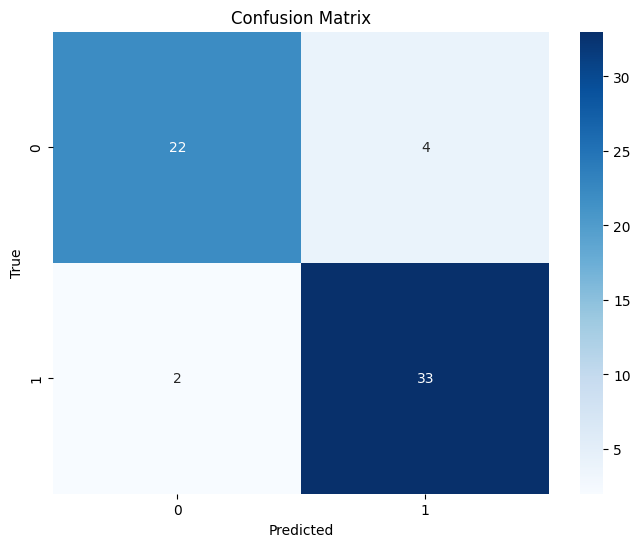

In [202]:
cm = confusion_matrix(y_test, y_pred_loaded)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [204]:
ht['cp'].unique()

array([3, 2, 1, 0])